In [1]:
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

In [2]:
seed_constant = 25
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

### DATASET PATH AND SIZE SPECIFY...


In [3]:
# IMAGE_HEIGHT , IMAGE_WIDTH = 128 , 128

# # Specify the number of frames of a video that will be fed to the model as one sequence.
# SEQUENCE_LENGTH = 10
# DATASET_DIR = 'PROPOSED_DATASET'  # Change this to the directory where you extracted the data
# CLASSES_LIST = ['fight', 'nonfight']

In [6]:
# # Specify the height and width of the images.
# IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128

# SEQUENCE_LENGTH = 18
# DATASET_DIR = "dataset_frames/fight"
# CLASSES_LIST = ["fight"]  # Since there are no subfolders, use a single class name

# def load_images():
#     images_list = []
#     class_dir = DATASET_DIR
#     image_files = os.listdir(class_dir)
#     image_files.sort()

#     for image_file in image_files:
#         image_path = os.path.join(class_dir, image_file)
#         image = cv2.imread(image_path)
#         resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
#         normalized_image = resized_image / 255.0
#         images_list.append(normalized_image)

#     return images_list


In [7]:
# def create_dataset():
#     train_features = []
#     train_labels = []

#     for class_index, class_name in enumerate(CLASSES_LIST):
#         print(f'Loading fight data for class: {class_name}')
#         images = load_images()

#         for i in range(0, len(images) - SEQUENCE_LENGTH + 1, SEQUENCE_LENGTH):
#             sequence = images[i:i + SEQUENCE_LENGTH]
#             train_features.append(sequence)
#             train_labels.append(class_index)

#     np.save('fight_features.npy', train_features)
#     np.save('fight_labels.npy', train_labels)

#     return np.array(train_features), np.array(train_labels)


In [8]:

# train_features, train_labels = create_dataset()

Loading fight data for class: fight


In [11]:
# train_features.shape , train_labels.shape

((882, 18, 128, 128, 3), (882,))

In [12]:
# # Specify the height and width of the images.
# IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128

# SEQUENCE_LENGTH = 18
# DATASET_DIR = "dataset_frames/nonfight"
# CLASSES_LIST = ["nonfight"]  # Since there are no subfolders, use a single class name

# def load_images():
#     images_list = []
#     class_dir = DATASET_DIR
#     image_files = os.listdir(class_dir)
#     image_files.sort()

#     for image_file in image_files:
#         image_path = os.path.join(class_dir, image_file)
#         image = cv2.imread(image_path)
#         resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
#         normalized_image = resized_image / 255.0
#         images_list.append(normalized_image)

#     return images_list


In [13]:
# def create_dataset():
#     nonfight_features = []
#     nonfight_labels = []

#     for class_index, class_name in enumerate(CLASSES_LIST):
#         print(f'Loading non_fight data for class: {class_name}')
#         images = load_images()

#         for i in range(0, len(images) - SEQUENCE_LENGTH + 1, SEQUENCE_LENGTH):
#             sequence = images[i:i + SEQUENCE_LENGTH]
#             nonfight_features.append(sequence)
#             nonfight_labels.append(class_index)

#     np.save('non_fight_features.npy', nonfight_features)
#     np.save('non_fight_labels.npy', nonfight_labels)

#     return np.array(nonfight_features), np.array(nonfight_labels)


In [15]:

# nonfight_features, train_labels = create_dataset()

In [3]:
# import cv2
# import numpy as np

# # Specify the height and width of the images.
# IMAGE_HEIGHT, IMAGE_WIDTH = 80, 80

# SEQUENCE_LENGTH = 18
# DATASET_DIR = "dataset_frames/"
# CLASSES_LIST = ["fight", "nonfight"]

# def load_images(class_name):
#     images_list = []
#     class_dir = os.path.join(DATASET_DIR, class_name)
#     image_files = os.listdir(class_dir)
#     image_files.sort()

#     for image_file in image_files:
#         image_path = os.path.join(class_dir, image_file)
#         image = cv2.imread(image_path)
#         resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
#         normalized_image = resized_image / 255.0
#         images_list.append(normalized_image)

#     return images_list


In [4]:
# def create_dataset():
#     features = []
#     labels = []

#     for class_index, class_name in enumerate(CLASSES_LIST):
#         print(f'Loading data for class: {class_name}')
#         images = load_images(class_name)

#         for i in range(0, len(images) - SEQUENCE_LENGTH + 1, SEQUENCE_LENGTH):
#             sequence = images[i:i + SEQUENCE_LENGTH]
#             features.append(sequence)
#             labels.append(class_index)

#     np.save('features.npy', features)
#     np.save('labels.npy', labels)

#     return np.array(features), np.array(labels)

In [5]:
# features, labels = create_dataset()

Loading data for class: fight
Loading data for class: nonfight


In [3]:
features=np.load("features.npy")
labels=np.load("labels.npy")

## FRAME EXTRACTION FROM VIDEOS 

In [6]:
features.shape , labels.shape

((1874, 18, 80, 80, 3), (1874,))

In [7]:
labels = np.expand_dims(labels, axis = 1)

In [8]:

# ones = np.ones((360,1), dtype = int)
# zero = np.zeros((359,1), dtype = int)

In [9]:
labels.shape

(1874, 1)

In [10]:
# labels = np.concatenate((zero,ones))


In [11]:
labels.shape

(1874, 1)

## SPLIT DATASET FOR MODEL ACCORDING TO DESIRED TEST_SIZE , TRAIN...

In [12]:

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.15, shuffle = True, random_state = seed_constant)

In [22]:
# from tensorflow.keras.models import Model
# def create_attention_model():
#     # Input layer
#     input_layer = Input(shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    
#     # CNN layers with batch normalization and max pooling
#     cnn_lstm = TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'))(input_layer)
#     cnn_lstm = TimeDistributed(MaxPooling2D((2, 2)))(cnn_lstm)
#     cnn_lstm = TimeDistributed(BatchNormalization())(cnn_lstm)
    
#     cnn_lstm = TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'))(cnn_lstm)
#     cnn_lstm = TimeDistributed(MaxPooling2D((2, 2)))(cnn_lstm)
#     cnn_lstm = TimeDistributed(BatchNormalization())(cnn_lstm)
    
#     cnn_lstm = TimeDistrib ted(Conv2D(64, (3, 3), activation='relu', padding='same'))(cnn_lstm)
#     cnn_lstm = TimeDistributed(MaxPooling2D((2, 2)))(cnn_lstm)
#     cnn_lstm = TimeDistributed(BatchNormalization())(cnn_lstm)
    
     
#     cnn_lstm = TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same'))(cnn_lstm)
#     cnn_lstm = TimeDistributed(MaxPooling2D((2, 2)))(cnn_lstm)
#     cnn_lstm = TimeDistributed(BatchNormalization())(cnn_lstm)

    
#     cnn_lstm = TimeDistributed(Flatten())(cnn_lstm)
    
#     # LSTM layers
#     lstm_input = TimeDistributed(Dense(32))(cnn_lstm)
#     lstm_output = Bidirectional(LSTM(64, return_sequences=True))(lstm_input)  # Using Bidirectional LSTM
#     lstm_output = BatchNormalization()(lstm_output)
    
#     lstm_output = LSTM(32)(lstm_output)
#     lstm_output = BatchNormalization()(lstm_output)
    
    
#     # Fully connected output layer for binary classification
#     output_layer = Dense(len(CLASSES_LIST), activation='Softmax')(lstm_output)
    
#     model = Model(inputs=input_layer, outputs=output_layer)
    
#     return model

### LSTM RECURRENT CONV NETWORK

In [16]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same', activation='relu'),
                              input_shape=(18, 80, 80, 3)))
    
    model.add(TimeDistributed(BatchNormalization()))  # Add BatchNormalization
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.20)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu')))
    
    model.add(TimeDistributed(BatchNormalization()))  # Add BatchNormalization
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.10)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    
    model.add(TimeDistributed(BatchNormalization()))  # Add BatchNormalization
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(16))
    
    model.add(Dense(1, activation='sigmoid'))
    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [17]:
from tensorflow.keras.models import Model

In [18]:
model = create_LRCN_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeD  (None, 18, 80, 80, 16)    448       
 istributed)                                                     
                                                                 
 time_distributed_14 (TimeD  (None, 18, 80, 80, 16)    64        
 istributed)                                                     
                                                                 
 time_distributed_15 (TimeD  (None, 18, 20, 20, 16)    0         
 istributed)                                                     
                                                                 
 time_distributed_16 (TimeD  (None, 18, 20, 20, 16)    0         
 istributed)                                                     
                                                                 
 time_distributed_17 (TimeD  (None, 18, 20, 20, 32)   

In [19]:
model.save('lrcn_model.h5')

C:\Users\DIP\anaconda3\envs\abdul\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# model = create_LRCN_model()

In [21]:
# model.output
# dummy=tf.random.normal(shape=(1,20,128,128,3))
# model(dummy)

In [42]:
# Create an Instance of Early Stopping Callback.
# early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min', restore_best_weights = True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [43]:
# Train the model
model_training_history=model.fit(features_train,
                                 labels_train,
                                 validation_data=(features_test, labels_test),
                                 epochs=50,
                                 batch_size=16)
#                                  callbacks = [early_stopping_callback])

Epoch 1/50
100/100 [==============================] - 176s 2s/step - loss: 0.1441 - accuracy: 0.9579 - val_loss: 0.0427 - val_accuracy: 0.9894
Epoch 2/50
100/100 [==============================] - 37s 373ms/step - loss: 0.0571 - accuracy: 0.9856 - val_loss: 0.0161 - val_accuracy: 0.9929
Epoch 3/50
100/100 [==============================] - 38s 376ms/step - loss: 0.0211 - accuracy: 0.9918 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 38s 380ms/step - loss: 0.0175 - accuracy: 0.9937 - val_loss: 0.0208 - val_accuracy: 0.9965
Epoch 5/50
100/100 [==============================] - 39s 386ms/step - loss: 0.0100 - accuracy: 0.9981 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 38s 383ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 38s 382ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0037 - val_accu

In [44]:
# Evaluate the trained model with attention.
model_evaluation_history_with_attention = model.evaluate(features_test, labels_test)

9/9 [==============================] - 2s 193ms/step - loss: 3.7799e-04 - accuracy: 1.0000


In [45]:
import matplotlib.pyplot as plt

def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label=metric_name_2)

    # Set y-axis range from 0.0 to 1.0
    plt.ylim(0, 1)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

    # Show the plot
    plt.show()


In [46]:
# def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    

#     # Get metric values using metric names as identifiers.
#     metric_value_1 = model_training_history.history[metric_name_1]
#     metric_value_2 = model_training_history.history[metric_name_2]

#     # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
#     epochs = range(len(metric_value_1))

#     # Plot the Graph.
#     plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
#     plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

#     # Add title to the plot.
#     plt.title(str(plot_name))

#     # Add legend to the plot.
#     plt.legend()

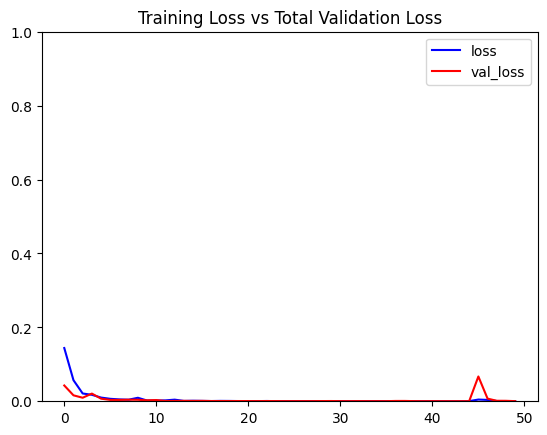

In [47]:
# Visualize the training and validation loss metrices.
plot_metric(model_training_history, 'loss', 'val_loss', 'Training Loss vs Total Validation Loss')

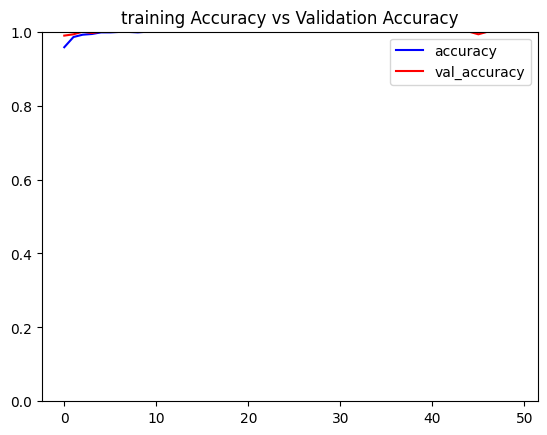

In [48]:
# Visualize the training and validation accuracy metrices.
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'training Accuracy vs Validation Accuracy')

In [41]:
# from tensorflow.keras.models import Model

# # Get the output tensor of the desired layer
# output_tensor = model.get_layer('time_distributed_15').output
# output_tensor

<KerasTensor: shape=(None, 18, 20, 20, 16) dtype=float32 (created by layer 'time_distributed_15')>

## confusion Matrics  and evaluation of MODEL

In [29]:
# Compute the predicted probabilities
predicted_probabilities = model.predict(features_test)

# Apply a threshold to convert probabilities to binary labels
threshold = 0.5  # You can adjust this threshold as needed
predicted_labels = (predicted_probabilities > threshold).astype(int)


6/6 [==============================] - 1s 15ms/step


In [30]:
np.unique(predicted_probabilities)

array([0.00194717, 0.00226948, 0.00261809, 0.00273643, 0.00285962,
       0.00286498, 0.00287046, 0.00298874, 0.00303252, 0.00314332,
       0.00389732, 0.00403047, 0.00449513, 0.00469482, 0.0065104 ,
       0.00651385, 0.00732298, 0.00803998, 0.00827242, 0.00883104,
       0.00944939, 0.00984814, 0.01059103, 0.01106544, 0.01111525,
       0.01148333, 0.01257642, 0.0127844 , 0.01378564, 0.01378743,
       0.01539085, 0.01571765, 0.01707416, 0.01723984, 0.01737939,
       0.02099414, 0.02233971, 0.02451224, 0.02730923, 0.03052589,
       0.03381946, 0.03578579, 0.03806205, 0.04977478, 0.05802451,
       0.06070682, 0.06242862, 0.06330966, 0.07478842, 0.07750833,
       0.0802827 , 0.09114789, 0.09187122, 0.0934554 , 0.09728415,
       0.09931259, 0.10807163, 0.1272894 , 0.13261077, 0.15428987,
       0.16035566, 0.17459495, 0.17935821, 0.18165313, 0.19279088,
       0.19830997, 0.22842656, 0.24866156, 0.25823027, 0.2624543 ,
       0.28319862, 0.30644584, 0.33494678, 0.38984066, 0.41488

In [31]:
predicted_labels.shape, predicted_probabilities.shape

((180, 1), (180, 1))

In [32]:
# Check unique values in labels_test and predicted_labels
unique_labels_test = np.unique(labels_test)
unique_predicted_labels = np.unique(predicted_labels)

print("Unique values in labels_test:", unique_labels_test)
print("Unique values in predicted_labels:", unique_predicted_labels)


Unique values in labels_test: [0 1]
Unique values in predicted_labels: [0 1]


In [33]:
# Reshape labels_test and predicted_labels
from sklearn.metrics import classification_report
labels_test_flat = labels_test.reshape(-1)
predicted_labels_flat = predicted_labels.reshape(-1)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(labels_test_flat, predicted_labels_flat)
classification_rep = classification_report(labels_test_flat, predicted_labels_flat, target_names=CLASSES_LIST)

print("Confusion Matrix:")
print(confusion)

print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[73 16]
 [ 7 84]]

Classification Report:
              precision    recall  f1-score   support

       fight       0.91      0.82      0.86        89
    nonfight       0.84      0.92      0.88        91

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180



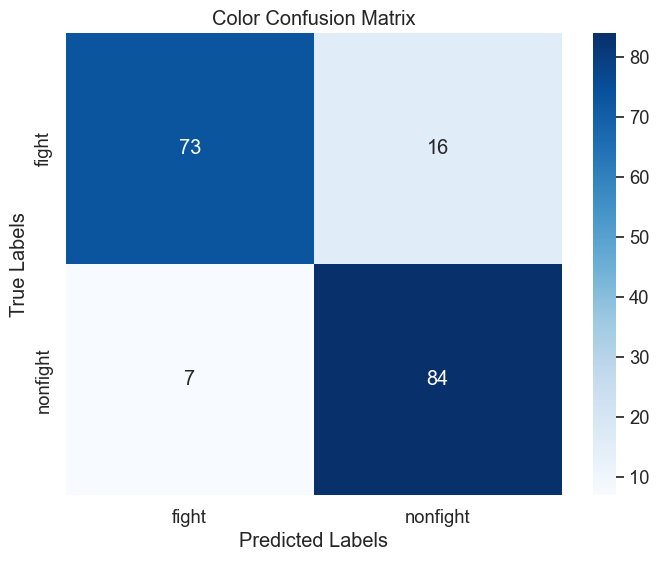

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = CLASSES_LIST  # Replace with your actual class names
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Color Confusion Matrix')

# Display the heatmap
plt.show()


## show frames in each class 

In [35]:

# # Function to get the frame count for a video
# def get_frame_count(video_path):
#     video_reader = cv2.VideoCapture(video_path)
#     frame_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
#     video_reader.release()
#     return frame_count

# # Initialize lists to store frame counts for each class
# class_0_frame_counts = []
# class_1_frame_counts = []

# # Iterate through each class
# for class_index, class_name in enumerate(CLASSES_LIST):
#     class_dir = os.path.join(DATASET_DIR, class_name)
    
#     # Initialize list to store frame counts for each video in the class
#     class_frame_counts = []
    
#     # Iterate through video files in the class
#     for video_file in os.listdir(class_dir):
#         video_path = os.path.join(class_dir, video_file)
#         frame_count = get_frame_count(video_path)
#         class_frame_counts.append(frame_count)
    
#     # Append the list of frame counts to the respective class list
#     if class_index == 0:
#         class_0_frame_counts.extend(class_frame_counts)
#     else:
#         class_1_frame_counts.extend(class_frame_counts)

# # Create a list of video indices for each class
# video_indices_class_0 = np.arange(len(class_0_frame_counts))
# video_indices_class_1 = np.arange(len(class_1_frame_counts))

# # Plot the frame distribution for class 0
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(video_indices_class_0, class_0_frame_counts, marker='.', color='blue', alpha=0.7)
# plt.title('Frame Distribution for Class 0 (Fight)')
# plt.xlabel('Video Index')
# plt.ylabel('Number of Frames')
# plt.grid(True)

# # Plot the frame distribution for class 1
# plt.subplot(1, 2, 2)
# plt.scatter(video_indices_class_1, class_1_frame_counts, marker='.', color='green', alpha=0.7)
# plt.title('Frame Distribution for Class 1 (Non-Fight)')
# plt.xlabel('Video Index')
# plt.ylabel('Number of Frames')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [36]:

# !pip install shap

In [37]:
# pip install keras-vis


In [38]:
# pip install keras-vis
#

In [39]:
# model.summary()

In [40]:
# list(model.layers[5].output.shape[0,10])

In [41]:
!pip install keras-vis==0.4.1
!pip install tf-keras-vis


## TEMPORAL SALIENCY MAP XAI

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize


In [110]:
saliency_maps = []
# Define a function to generate saliency maps
def generate_saliency_maps(model, video_frames):

    # Convert video_frames to a TensorFlow tensor
    video_frames = tf.convert_to_tensor(video_frames, dtype=tf.float32)
    print("sahpe videosframes :",video_frames.shape)
    video_frames = tf.expand_dims(video_frames, axis=0)  # Add a batch dimension
    print("shapeafte expand videosframes :",video_frames.shape)
    


    # Create a gradient tape to record operations for computing gradients
    with tf.GradientTape() as tape:
        # Watch the input frames
        tape.watch(video_frames)

        # Make predictions with the model
        predictions = model(video_frames, training=False)

        # Get the predicted class score (you may need to adjust this based on your model)
        predicted_class_score = predictions[:, 0]  # Assuming binary classification
        print("predicted_class_score", predicted_class_score)

    # Calculate the gradients of the predicted class score with respect to the input frames
    gradients = tape.gradient(predicted_class_score, video_frames)
    print("gradients" , gradients.shape)

    # Calculate the absolute mean of the gradients along the frame dimension
    saliency_map = tf.reduce_mean(tf.abs(gradients), axis=-1)

    # Normalize the saliency map
    saliency_map = (saliency_map - tf.reduce_min(saliency_map)) / (tf.reduce_max(saliency_map) - tf.reduce_min(saliency_map))
    
    # Convert the saliency map to NumPy array
    saliency_map = saliency_map.numpy() 

    # Add saliency maps to the list
    saliency_maps.append(saliency_map)
    print("framessahpe per frames :",saliency_maps[0].shape)

    return saliency_maps

### TEST A VIDIOS AND CREATE SALIENCY MAP FOR THOSE FRAMES

In [111]:
import cv2
import numpy as np

# Read the video file
cap = cv2.VideoCapture('fi60_xvid.avi')
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

# Choose a segment of 20 frames (adjust the start and end indices as needed)
selected_frames = frames[:20]

# Resize frames to match the expected spatial dimensions (64x64)
resized_frames = [cv2.resize(frame, (64, 64)) for frame in selected_frames]

# Convert frames to NumPy array
video_frames = np.array(resized_frames)

# Ensure the shape matches the expected input shape of your model
print("Shape of video frames before expanding dimensions:", video_frames.shape)

# Add batch and temporal dimensions to the frames
# video_frames = np.expand_dims(video_frames, axis=0)  # Add batch dimension
# video_frames = np.expand_dims(video_frames, axis=1)  # Add temporal dimension

# Ensure the shape matches the expected input shape of your model
print("Shape of video frames after expanding dimensions:", video_frames.shape)

# Generate saliency maps using the modified input data
saliency_maps = generate_saliency_maps(model, video_frames)


Shape of video frames before expanding dimensions: (20, 64, 64, 3)
Shape of video frames after expanding dimensions: (20, 64, 64, 3)
sahpe videosframes : (20, 64, 64, 3)
shapeafte expand videosframes : (1, 20, 64, 64, 3)
predicted_class_score tf.Tensor([0.5275301], shape=(1,), dtype=float32)
gradients (1, 20, 64, 64, 3)
framessahpe per frames : (1, 20, 64, 64)


In [112]:
# # Generate saliency maps for a specific video
# video_index = 0  # Replace with the index of the video you want to visualize
# video_frames = features_test[video_index]
# video_frames[0].shape

In [113]:
# import numpy as np

# # Convert video_frames to a NumPy array
# video_frames_array = np.array(video_frames)

# # Add batch dimension
# # video_frames_array = np.expand_dims(video_frames_array, axis=0)

# # Generate saliency maps using the modified input data
# saliency_maps = generate_saliency_maps(model, video_frames_array)



In [114]:
video_frames.shape , len(video_frames)

((20, 64, 64, 3), 20)

In [115]:
# saliency_maps = generate_saliency_maps(model, video_frames)


In [116]:
len(saliency_maps)

1

In [117]:
saliency_maps[0][0].shape

(20, 64, 64)

In [118]:
video_frames[0].shape

(64, 64, 3)

In [119]:
saliency_maps[0].shape

(1, 20, 64, 64)

### ORIGNAL FRAMES FROM A TEST VIDEO

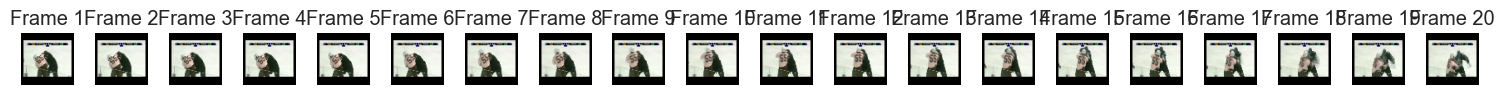

In [120]:
# Visualize saliency maps and frames
plt.figure(figsize=(15, 5))
for i in range(SEQUENCE_LENGTH):
    plt.subplot(2, SEQUENCE_LENGTH, i + 1)
    plt.imshow(video_frames[i])
    plt.axis('off')
    plt.title(f'Frame {i + 1}')


plt.tight_layout()
plt.show()


In [121]:
import os

# Create a directory to save the frames
if not os.path.exists("frames orignal"):
    os.makedirs("frames orignal")

# Loop through the frames and save them
for i in range(SEQUENCE_LENGTH):
    fig, ax = plt.subplots(figsize=(10, 10))
    frame = video_frames[i]
    plt.imshow(frame)
    plt.tight_layout()
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    frame_filename = f"frames orignal/smframe{i + 1}.png"
    plt.savefig(frame_filename, dpi=500)
    plt.close()

print("Frames saved.")


Frames saved.


### FIRST FRAME FROMT THE ORIGNAL FRAMES

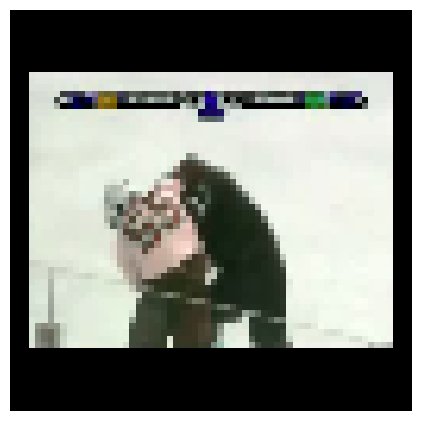

In [122]:
plt.imshow(video_frames[1])

plt.tight_layout()
plt.axis('off')
# plt.savefig("frames with saliencymap/frames2.png" , dpi=500)

plt.show()

In [123]:
pwd

'D:\\FAISAL FYP\\fyb final result XAI'

### SHOWING FIRST FRAME OF THE SALIENCY MAP 

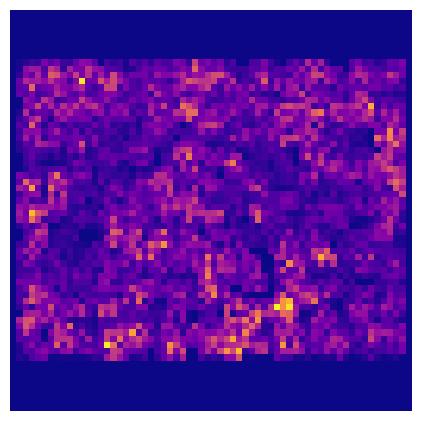

In [124]:
plt.imshow(saliency_maps[0][0, 0],cmap="plasma")

plt.tight_layout()
plt.axis('off') 
# plt.savefig("frames with saliencymap/frames2.png" , dpi=500)

plt.show()

## ALL SEQUENCES FRAMES FROM SALIENCY MAP

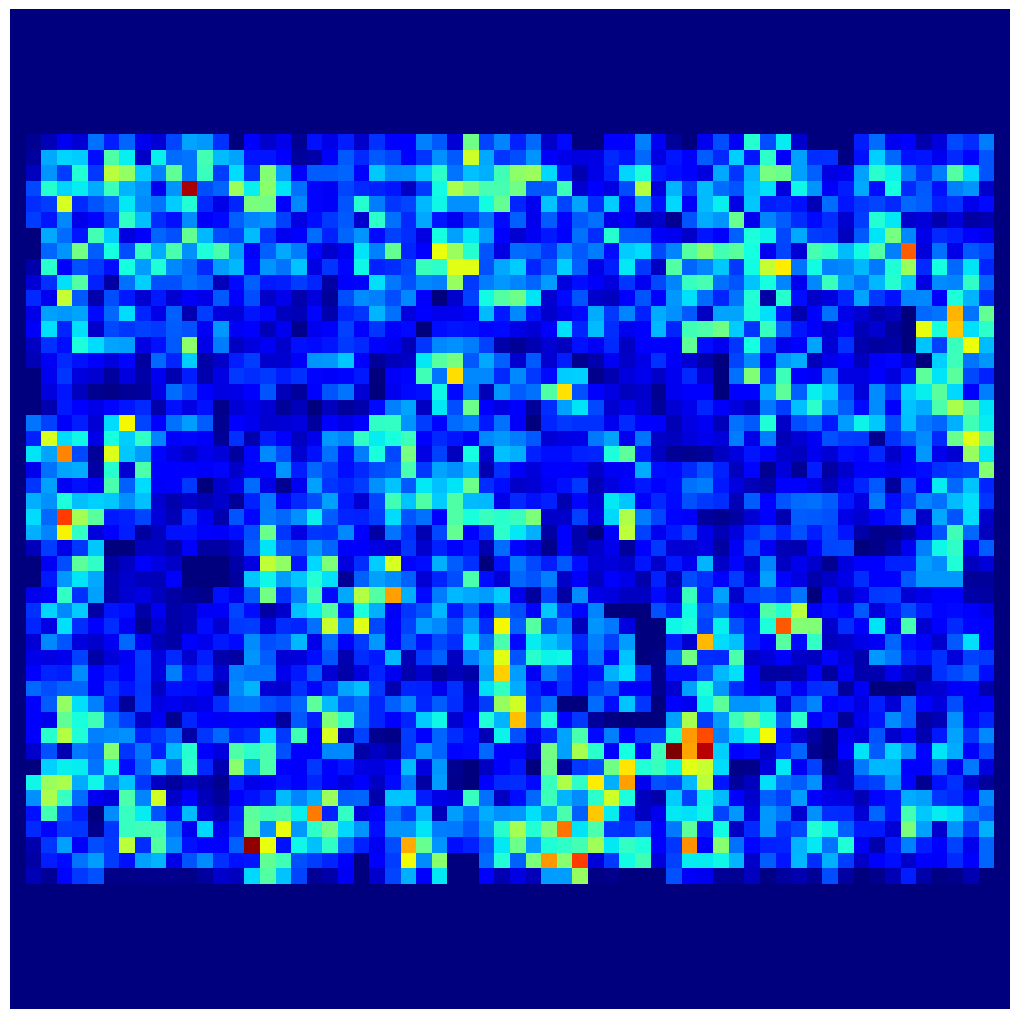

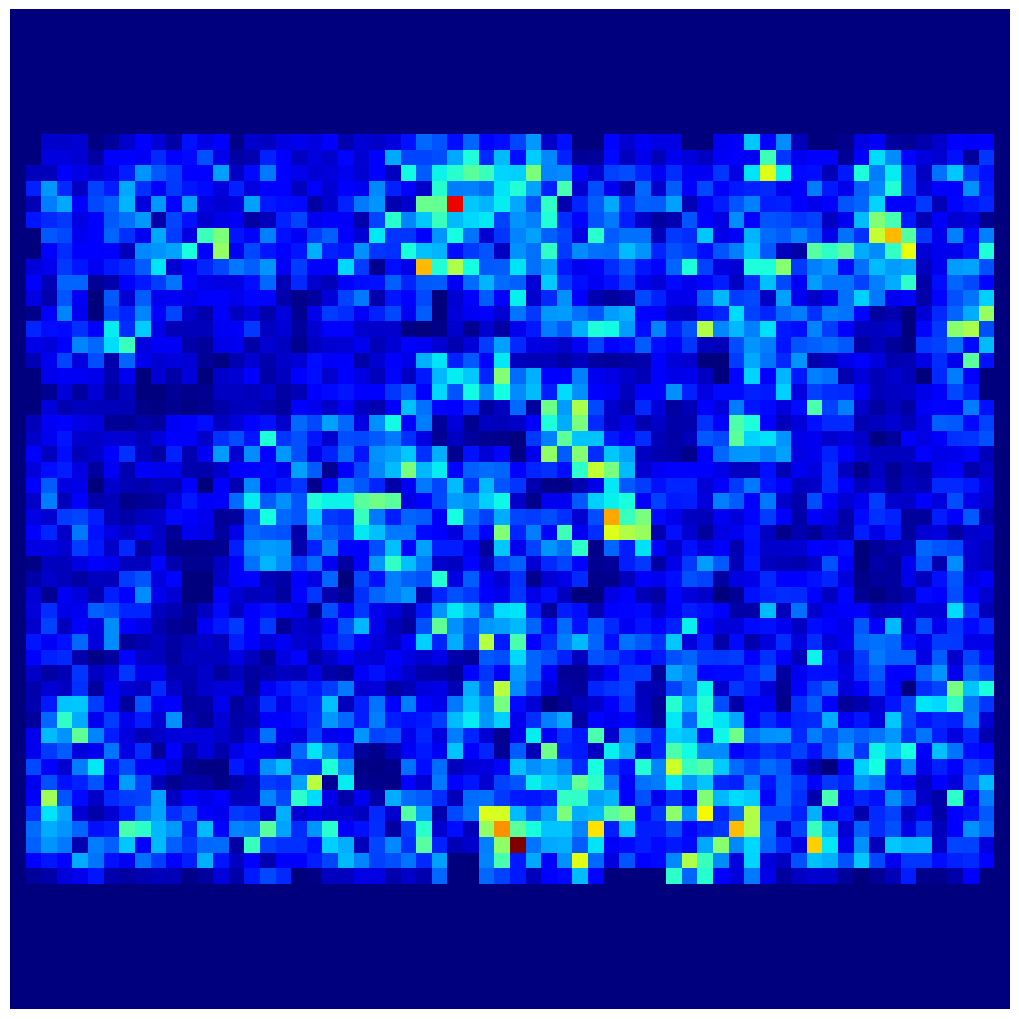

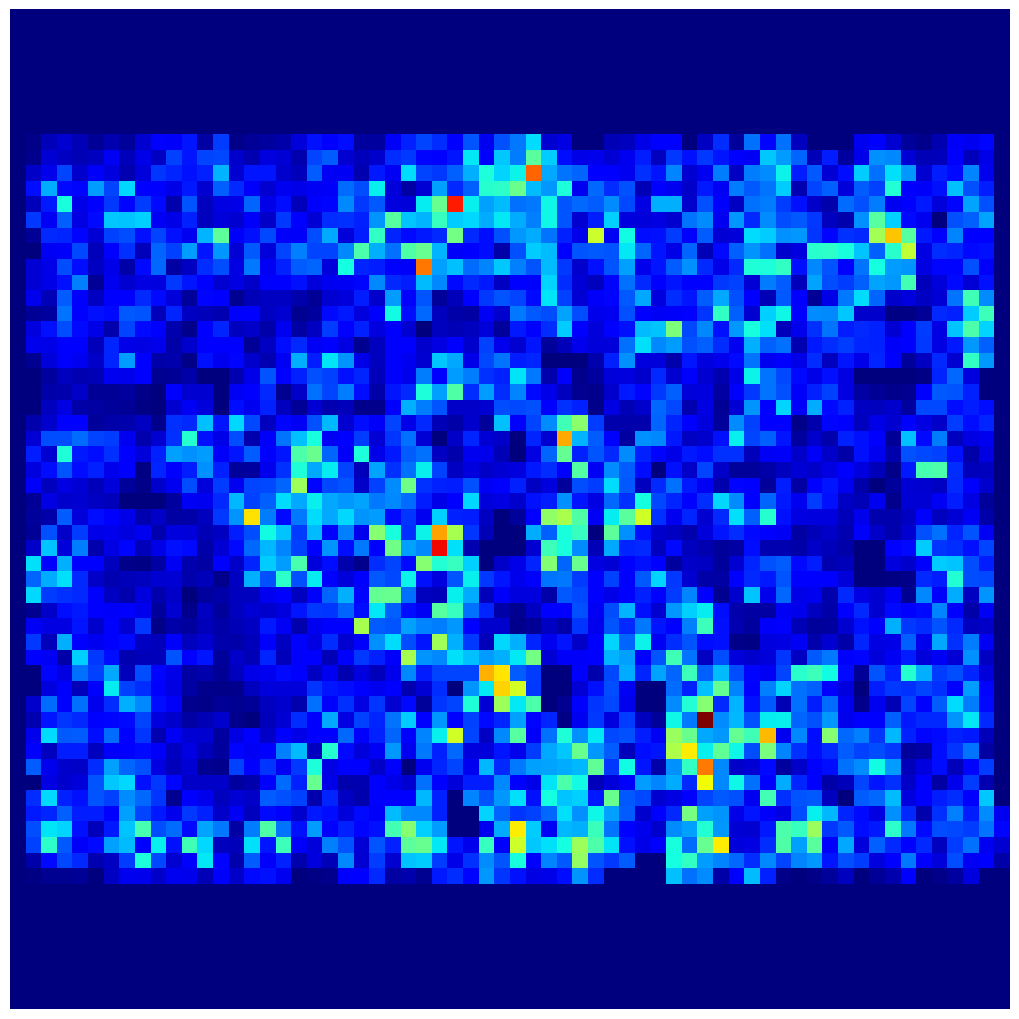

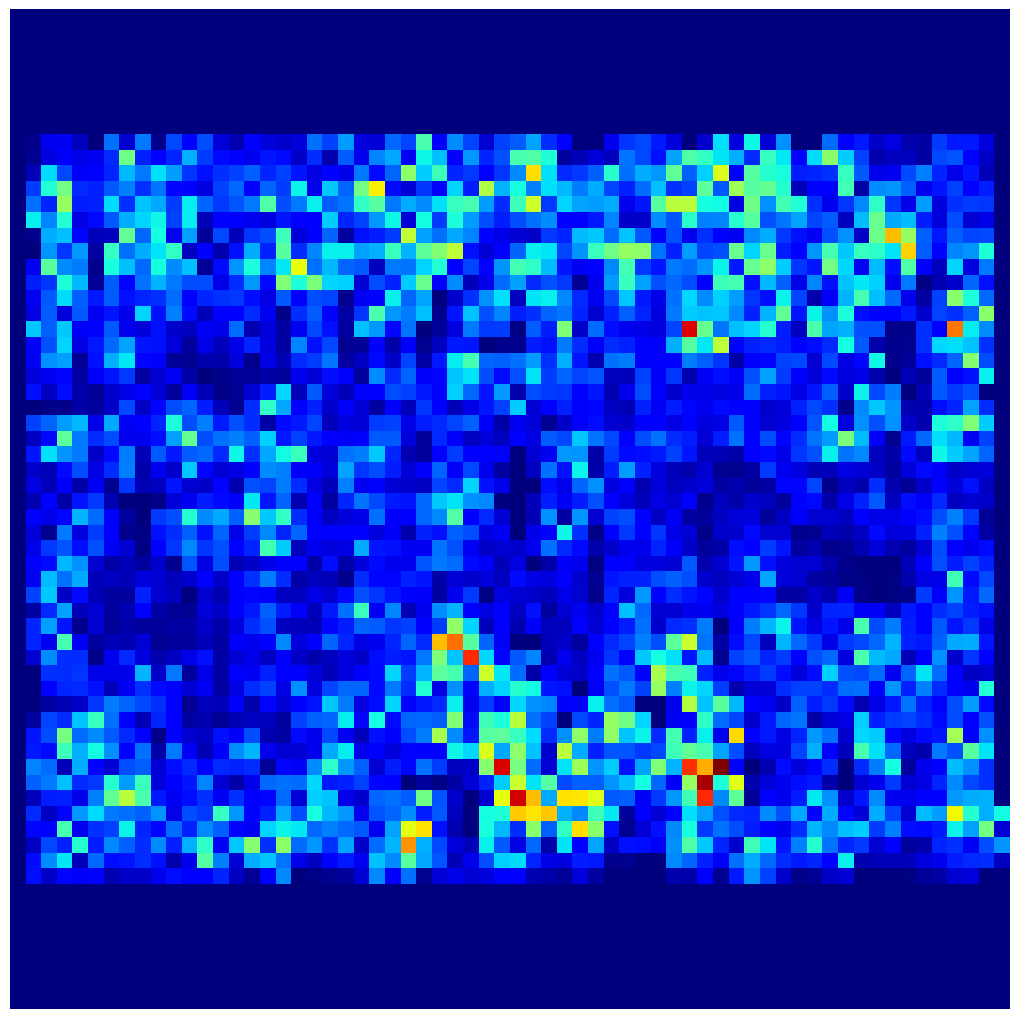

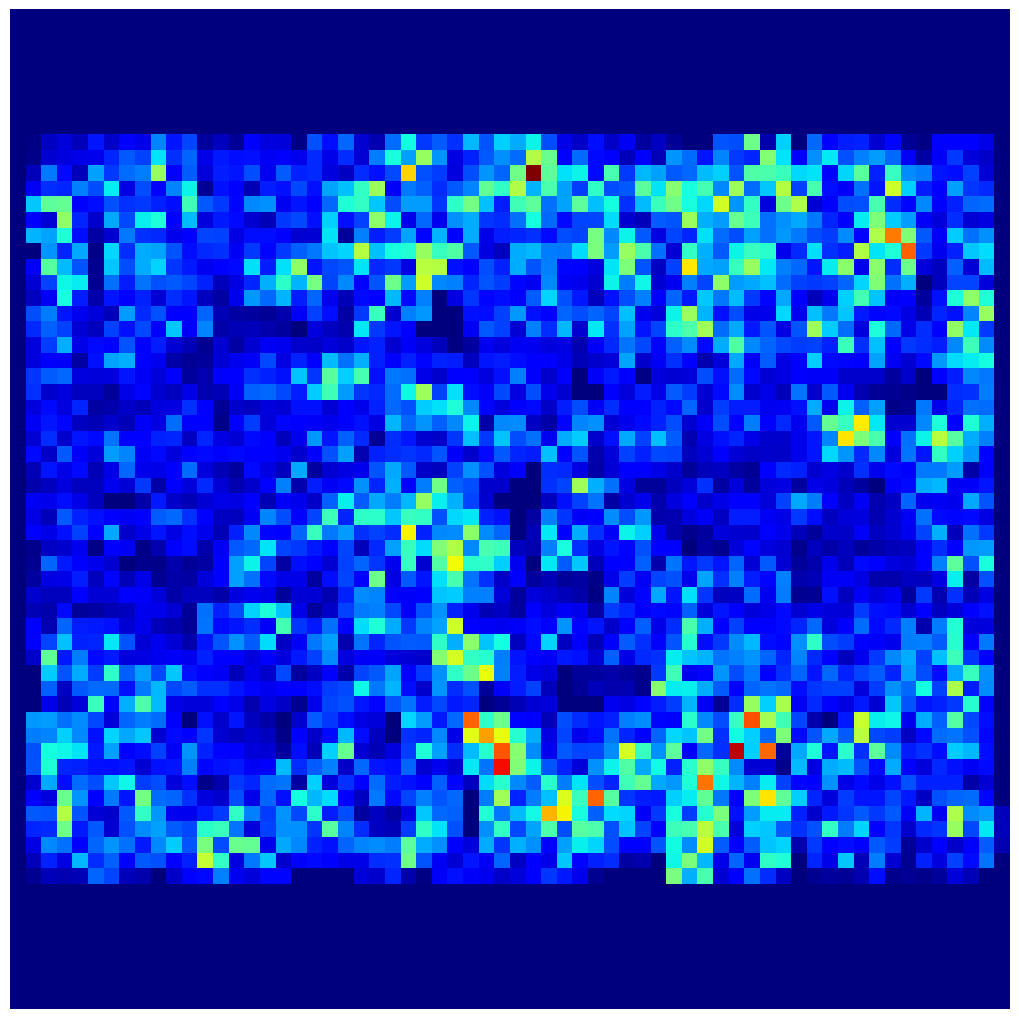

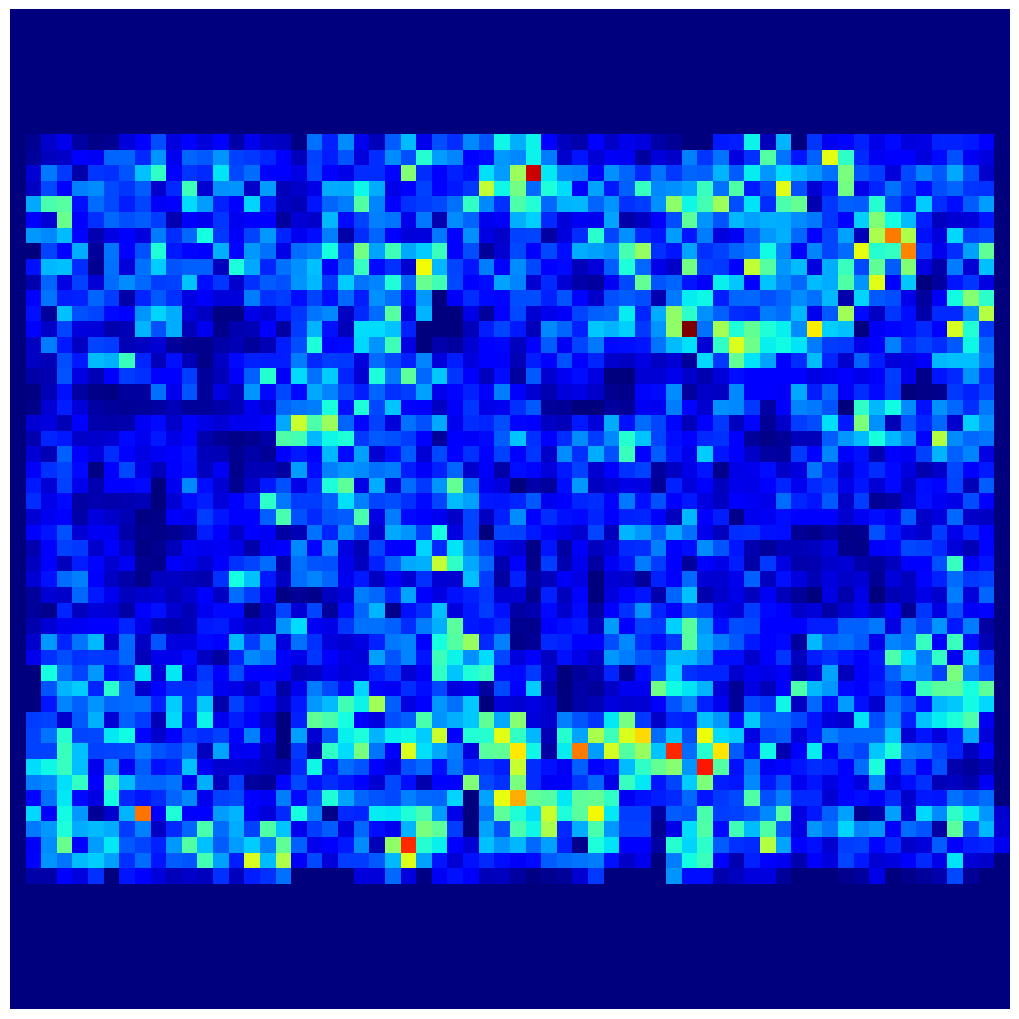

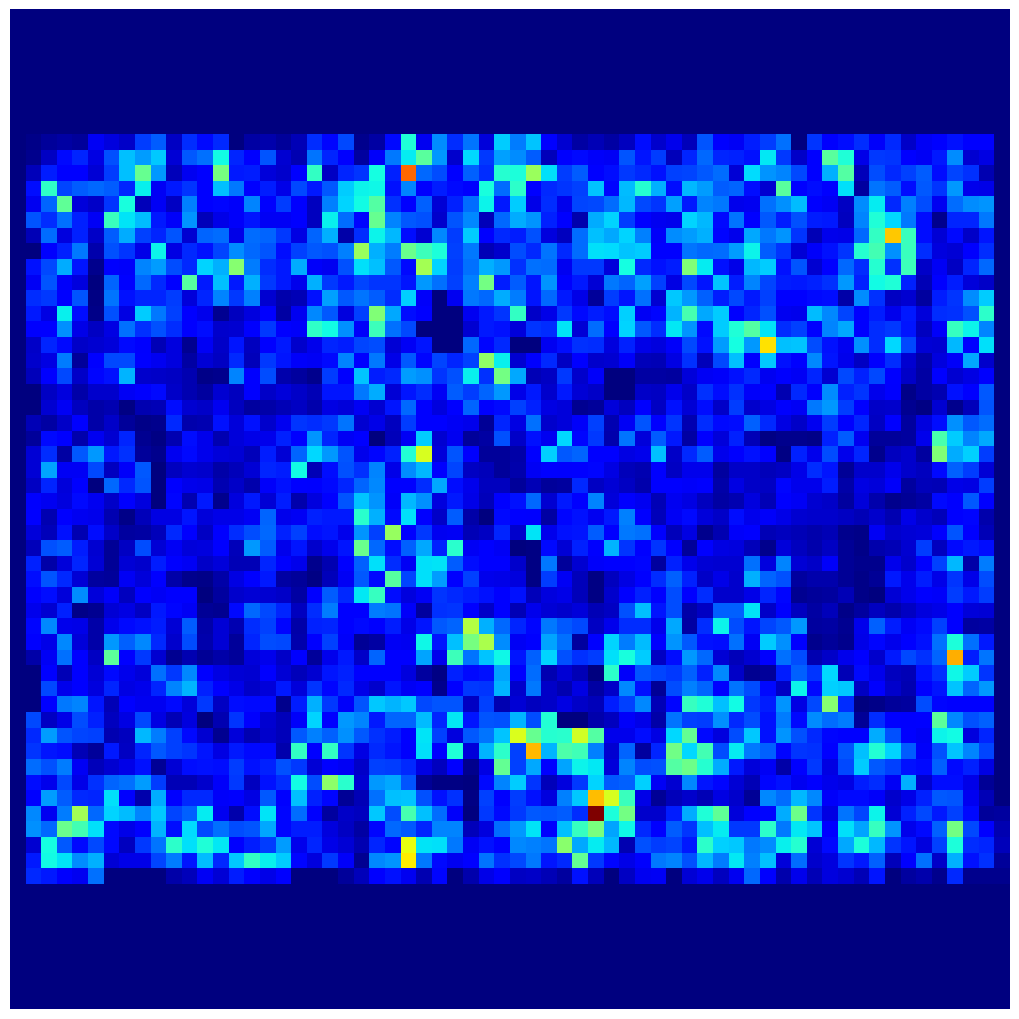

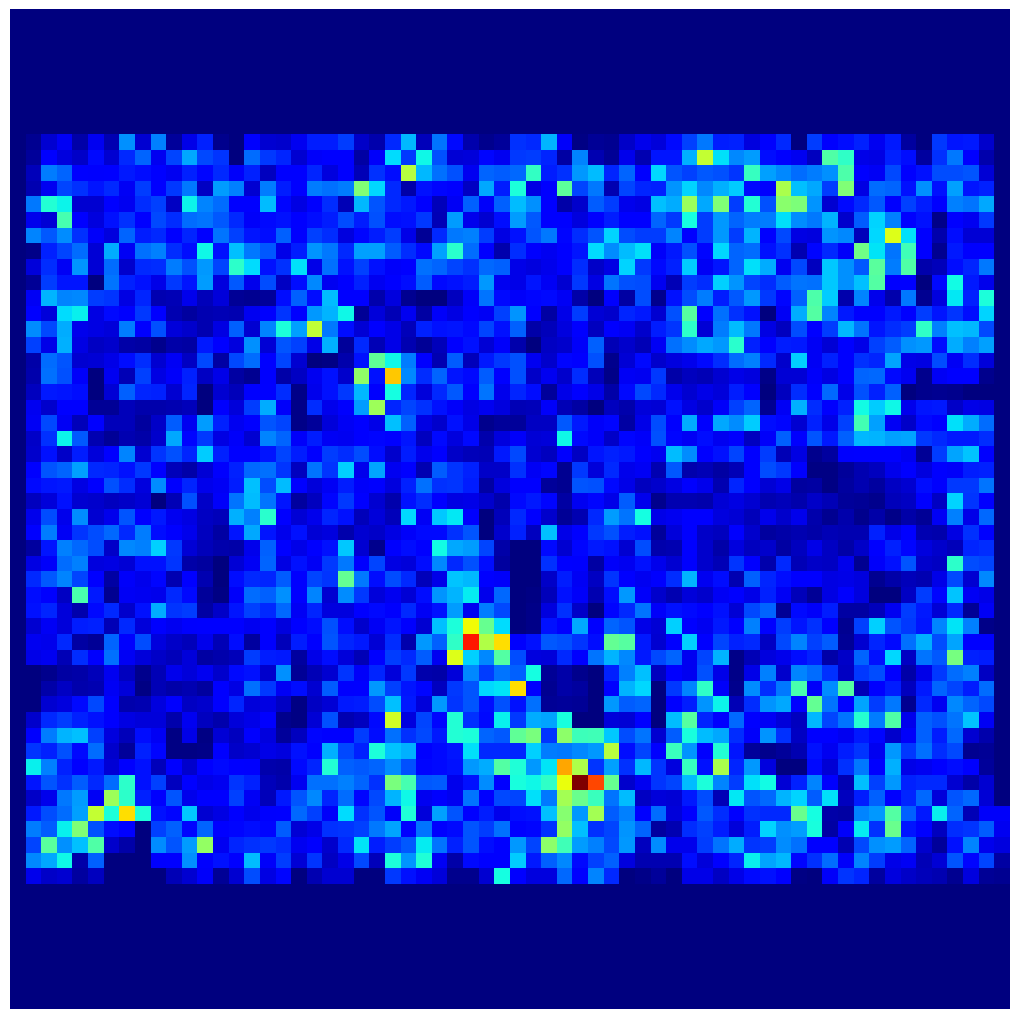

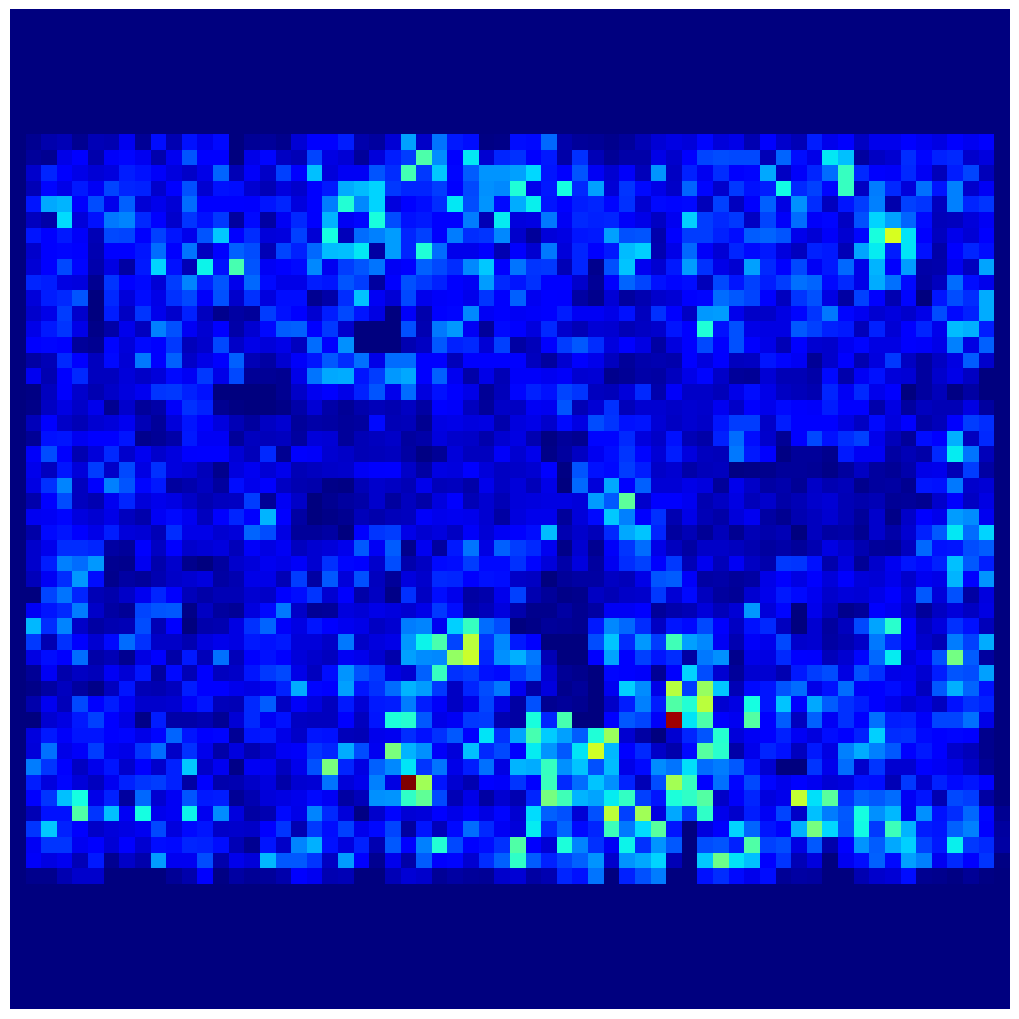

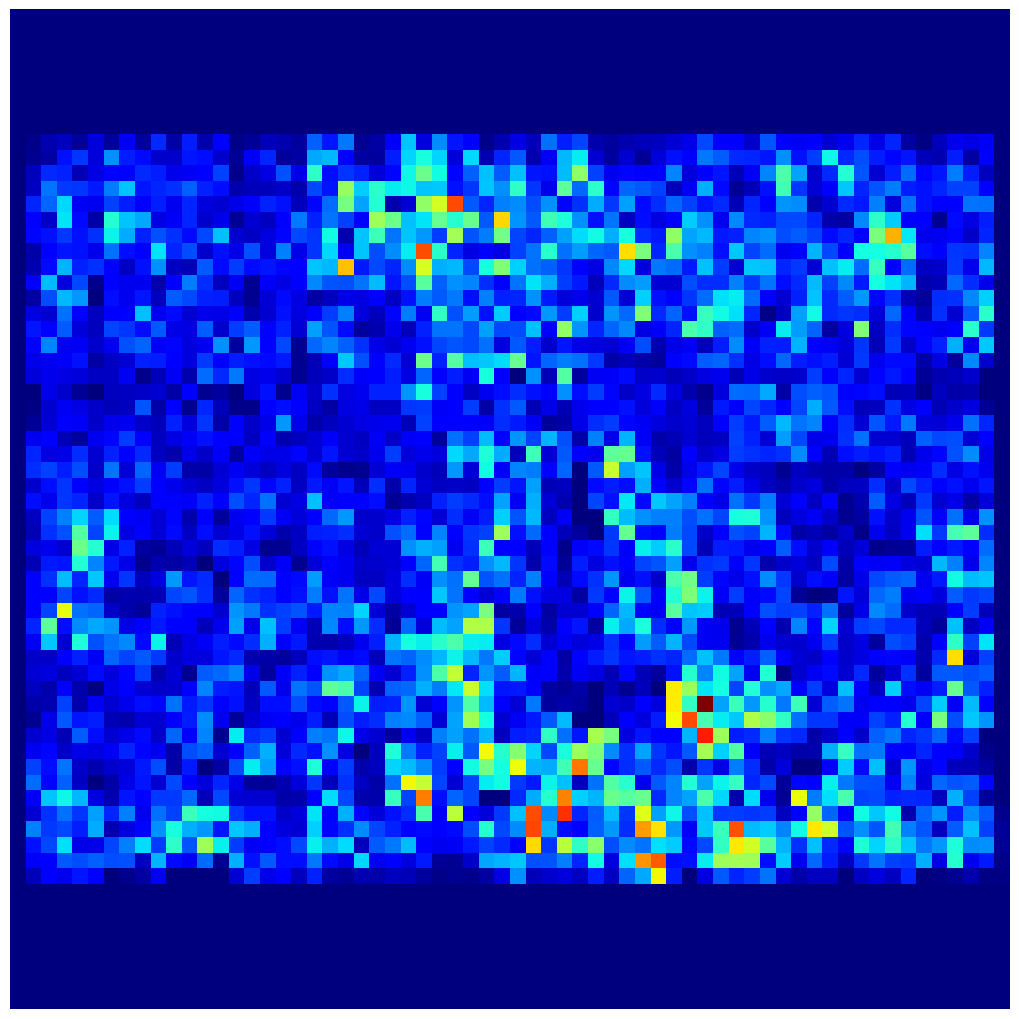

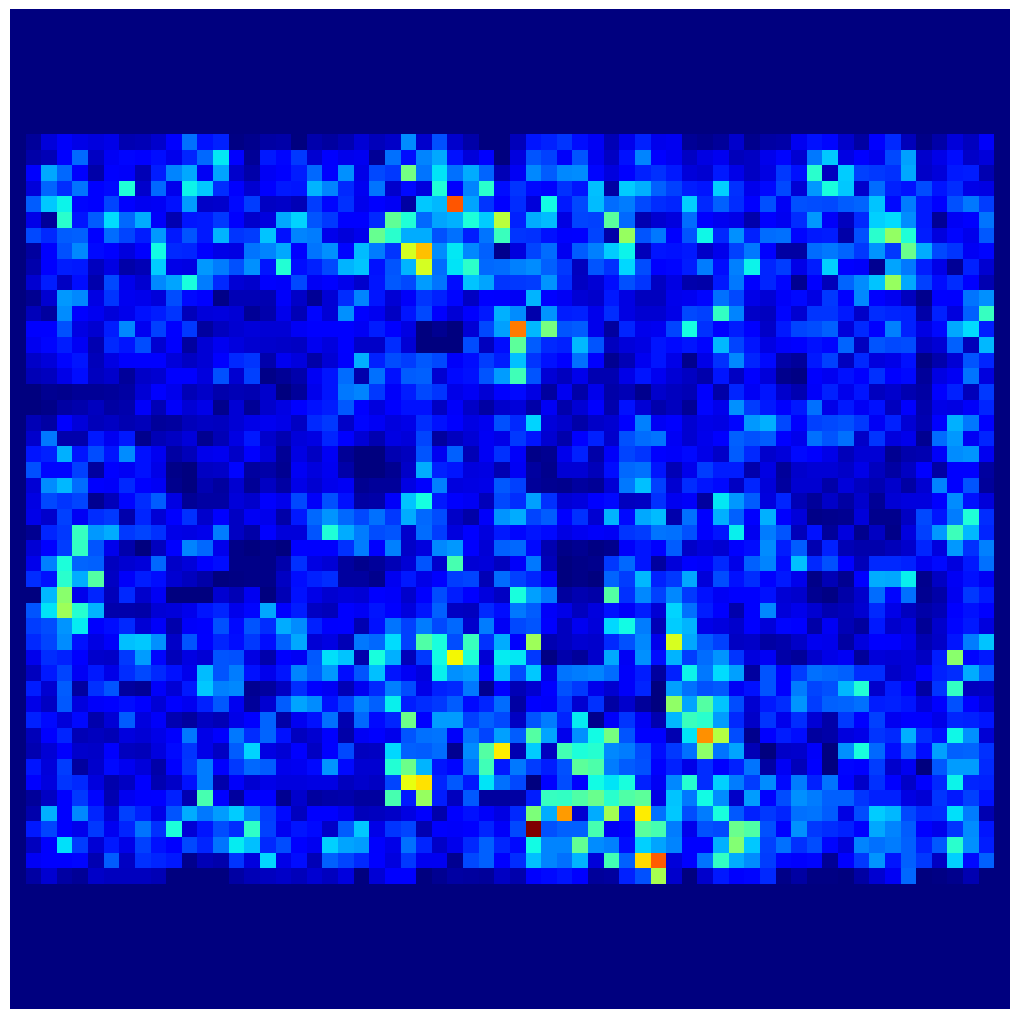

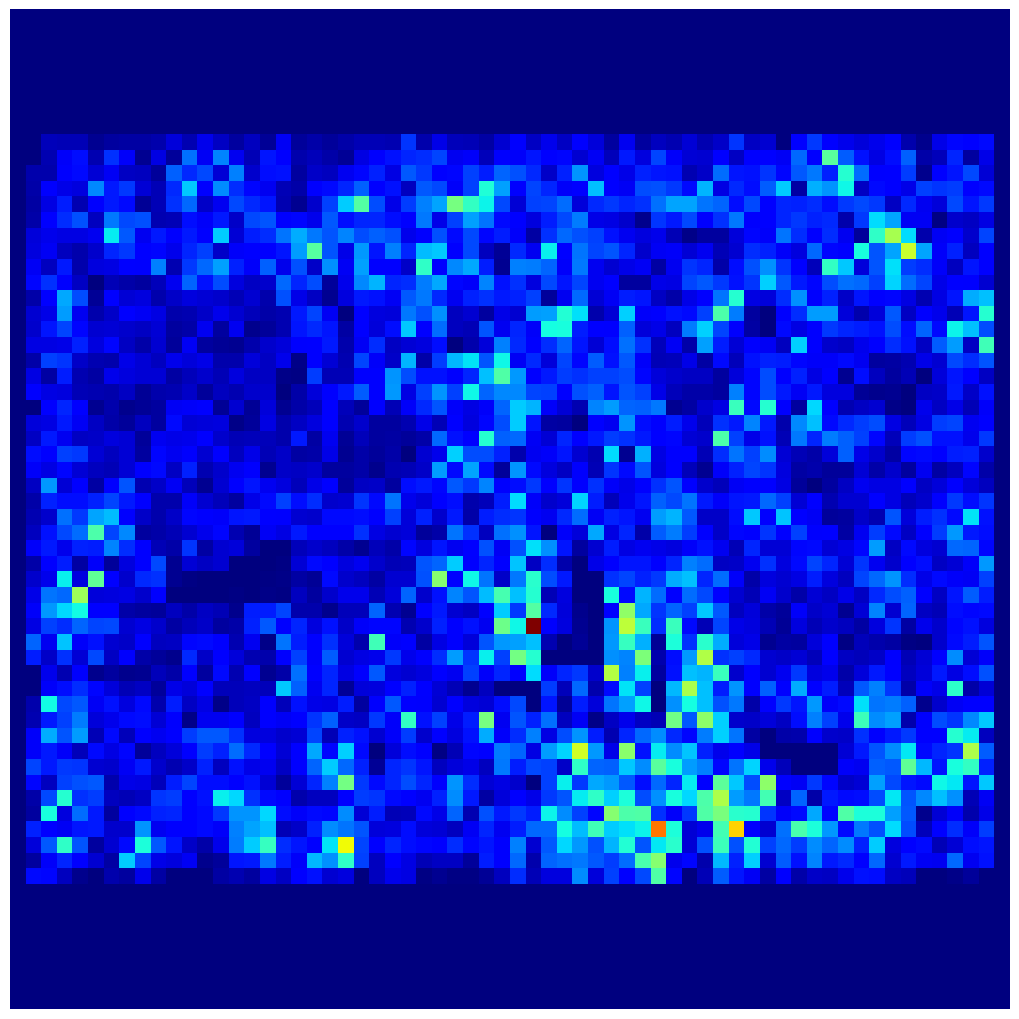

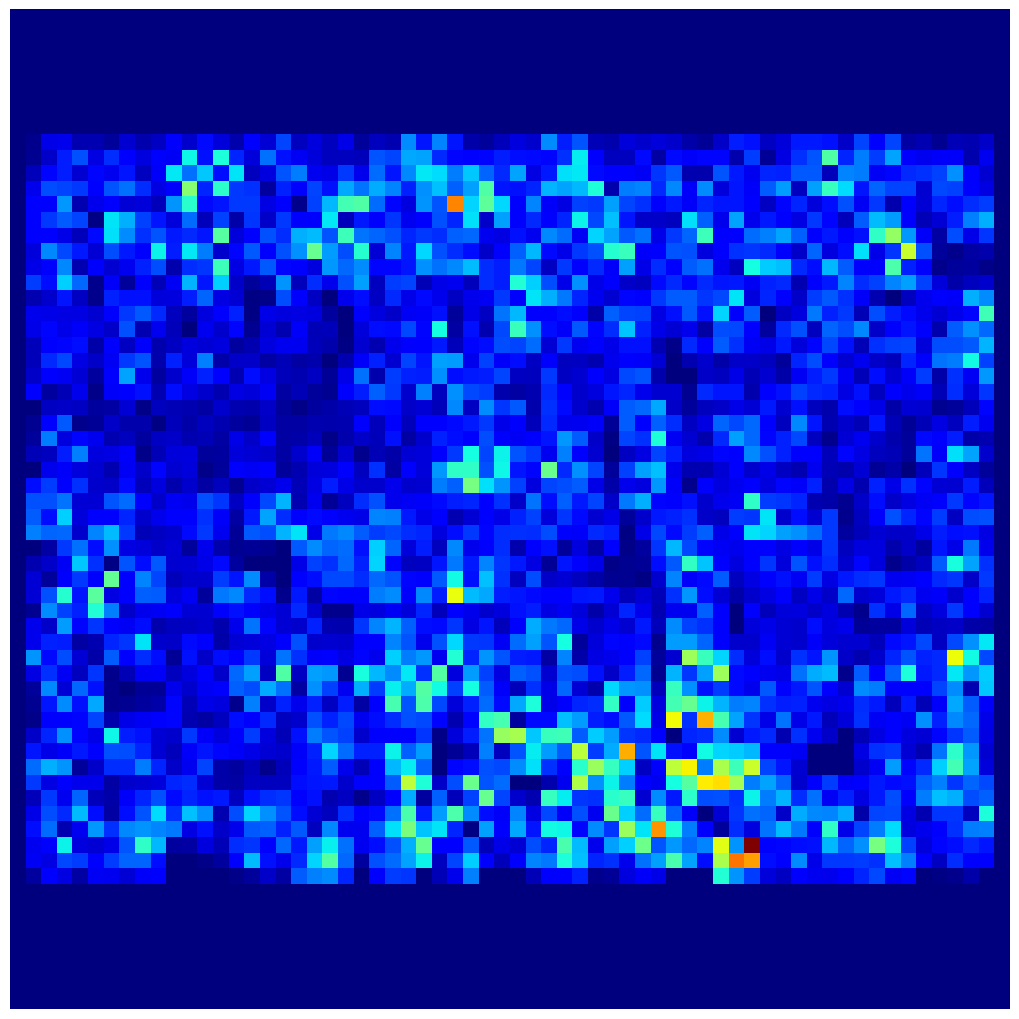

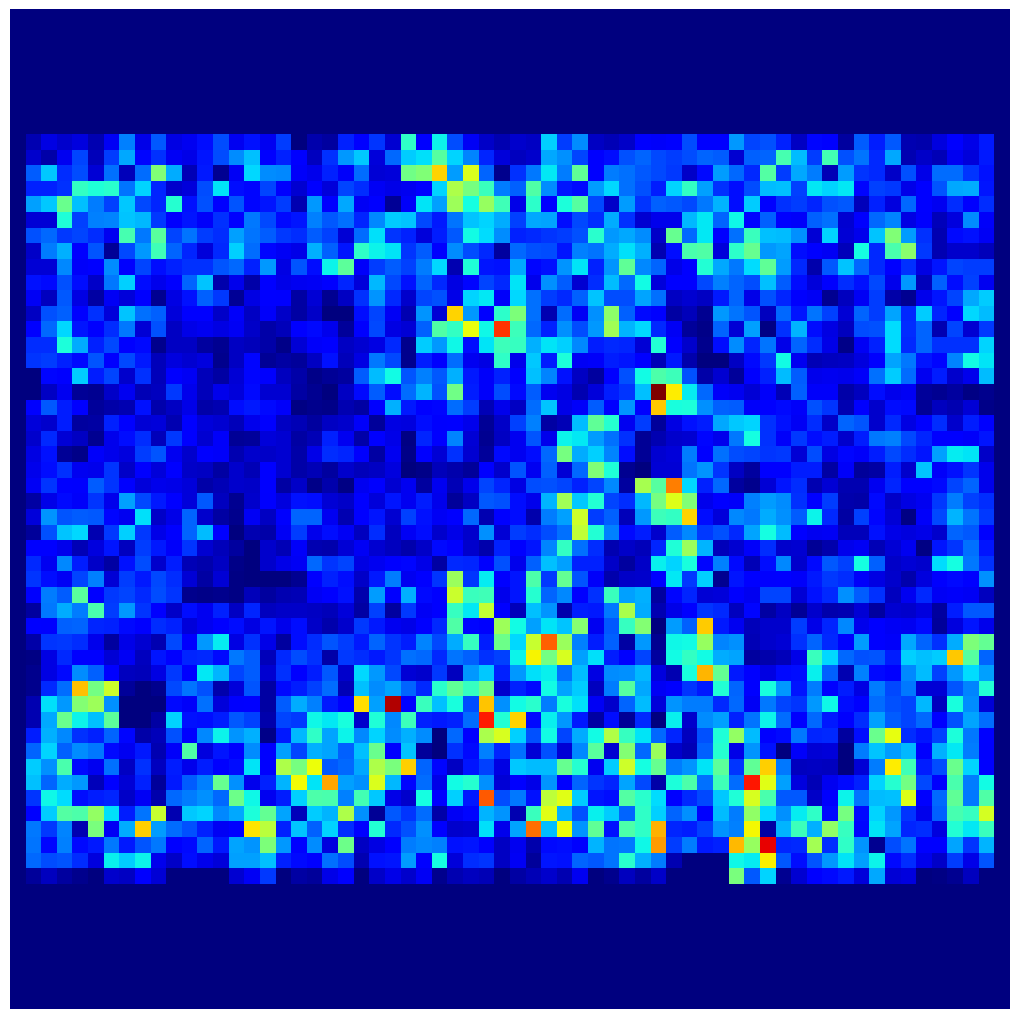

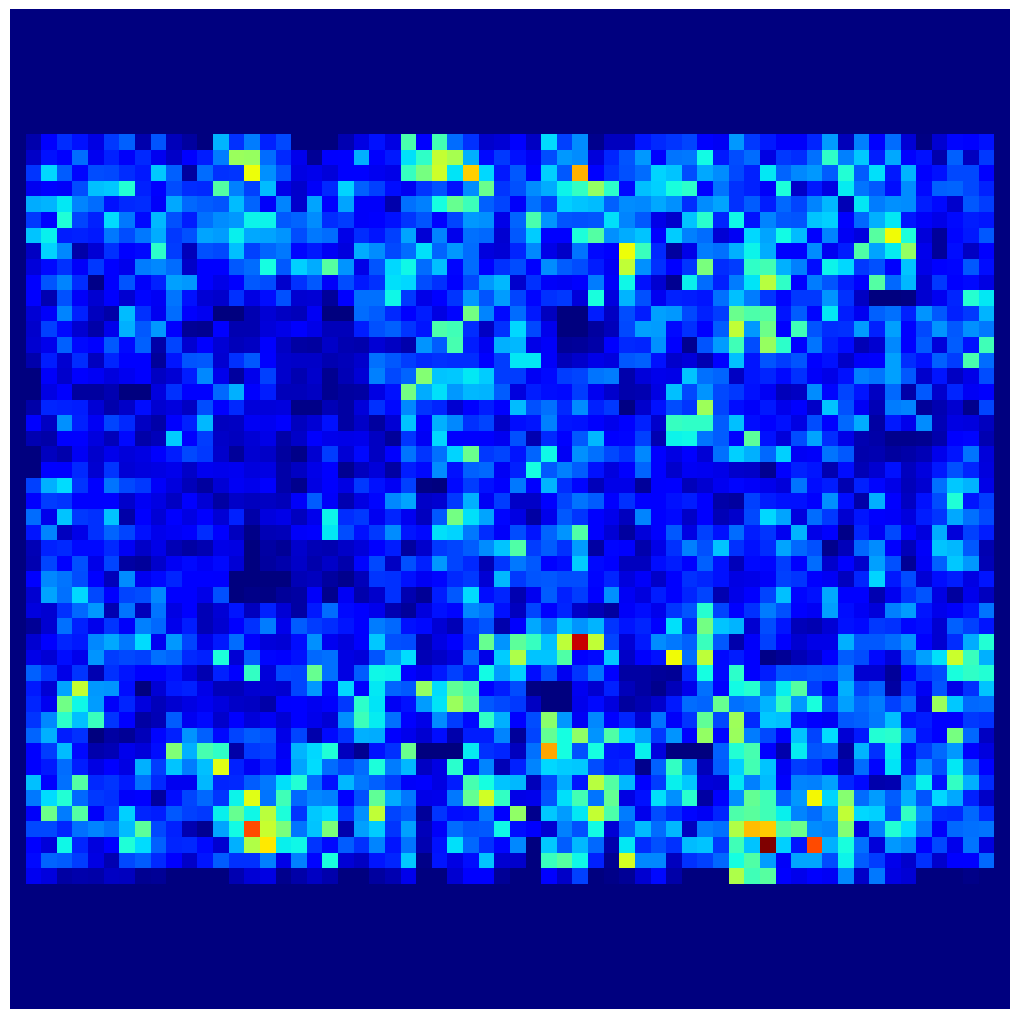

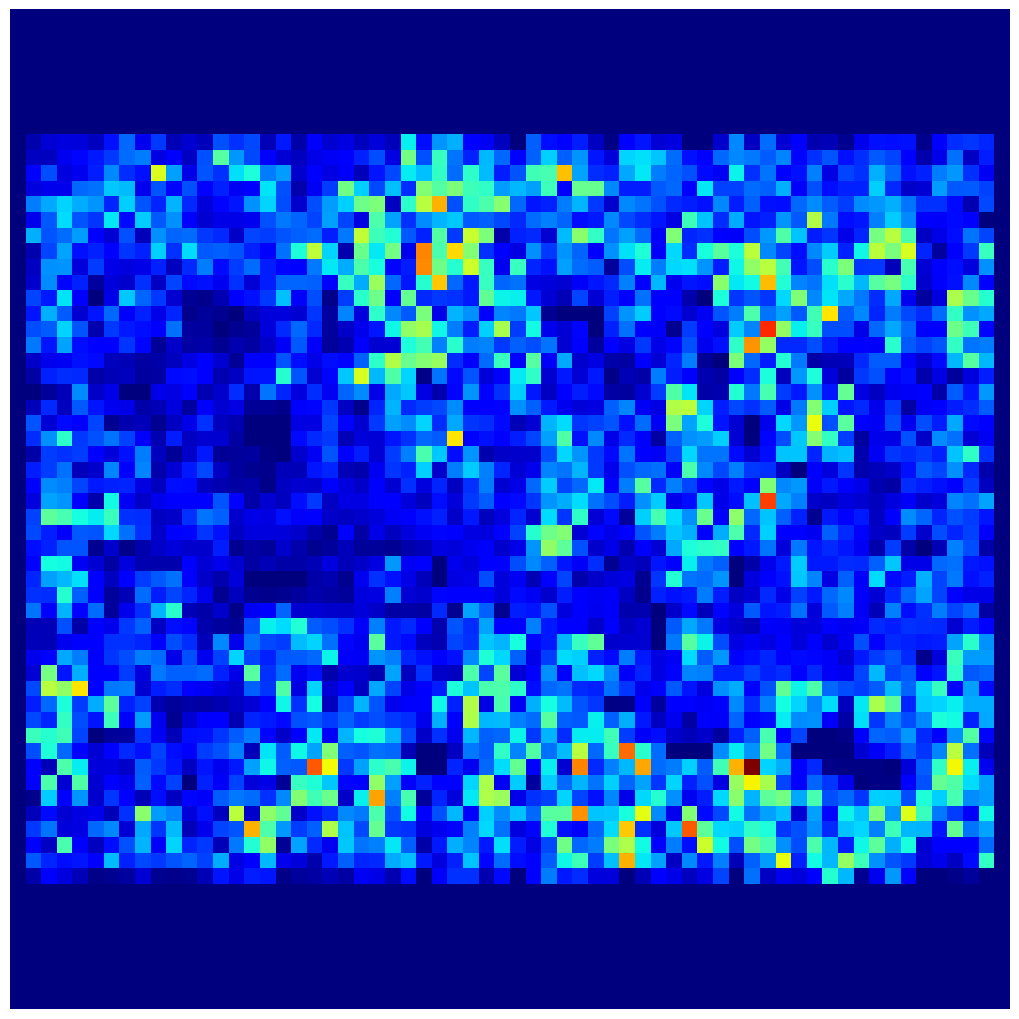

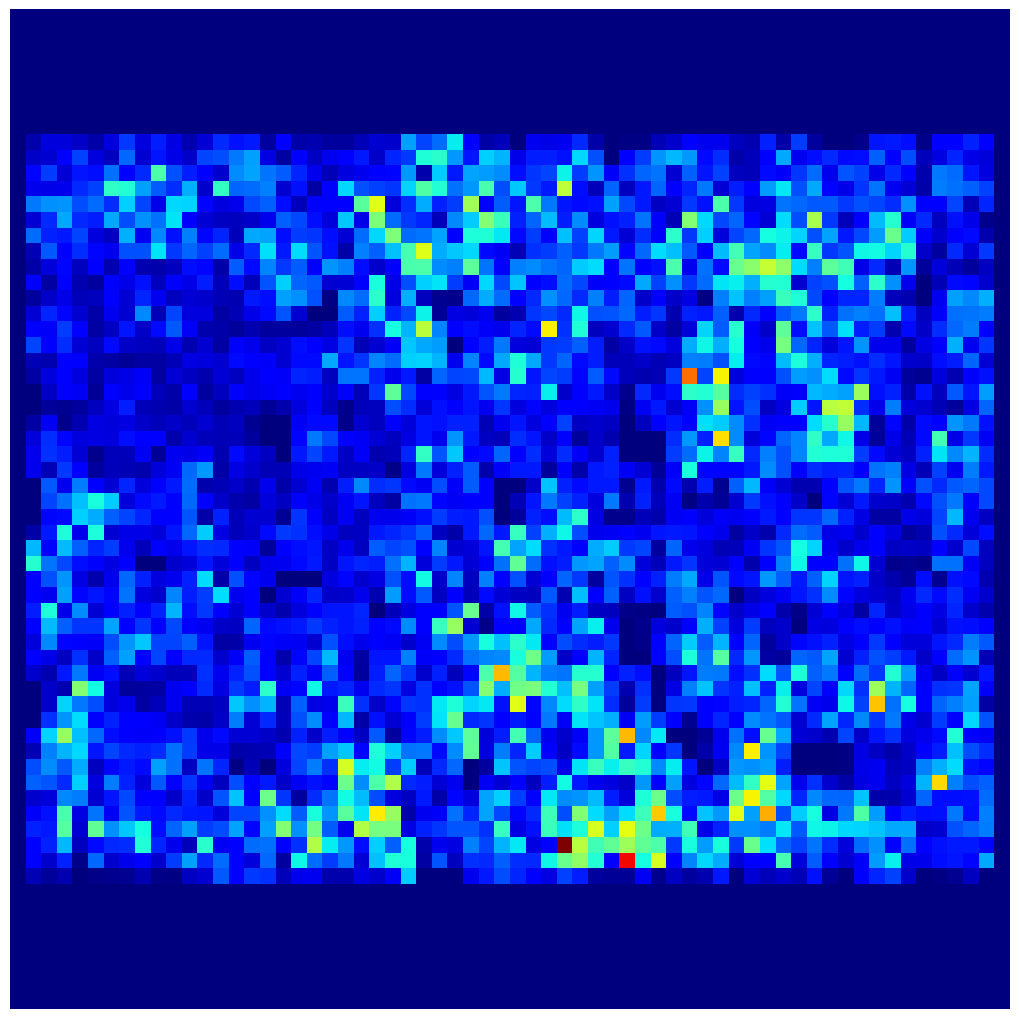

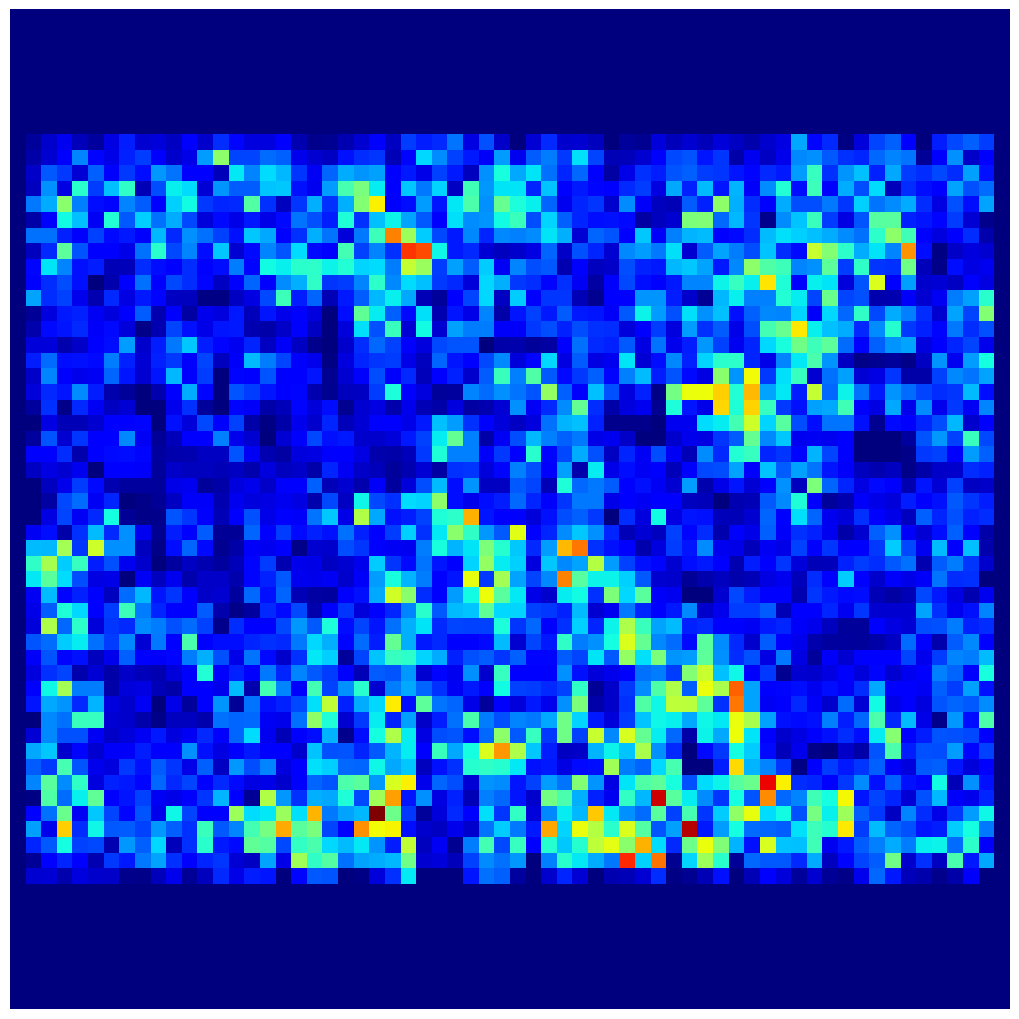

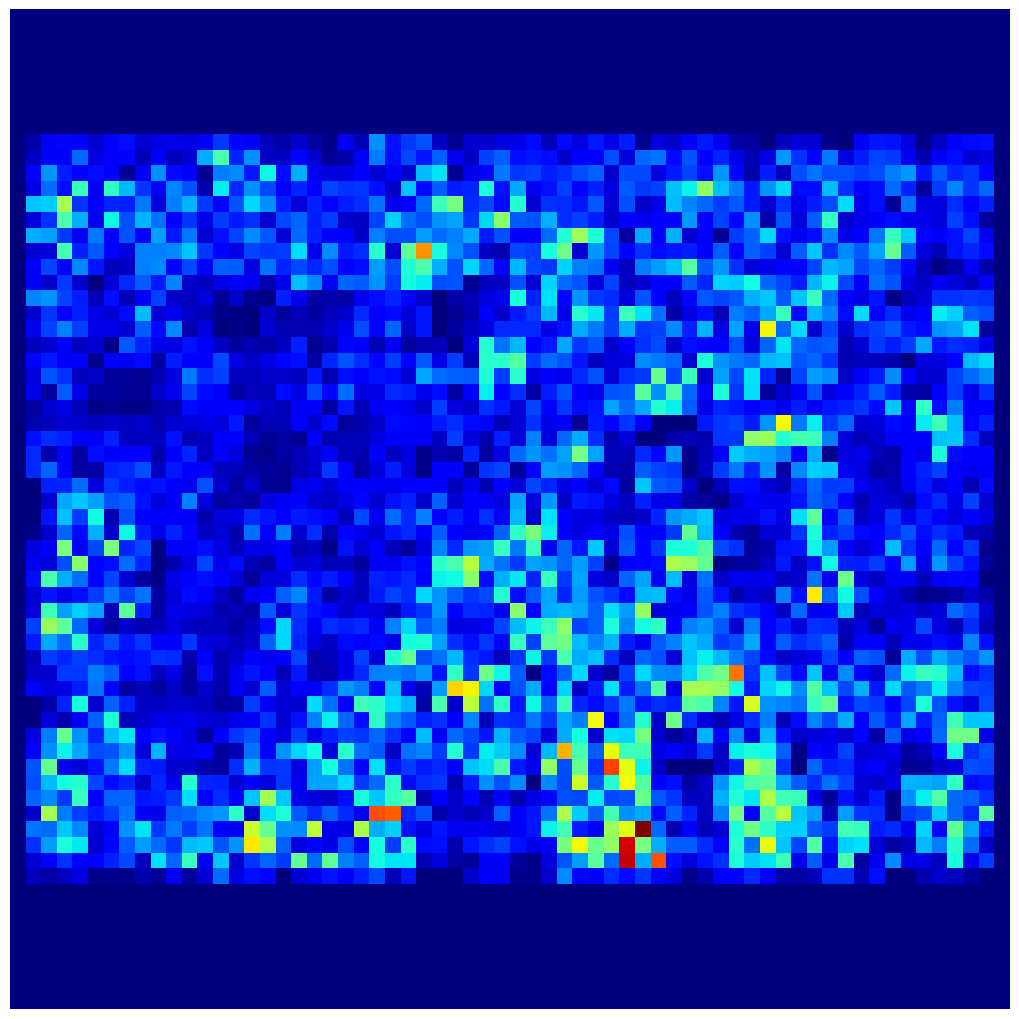

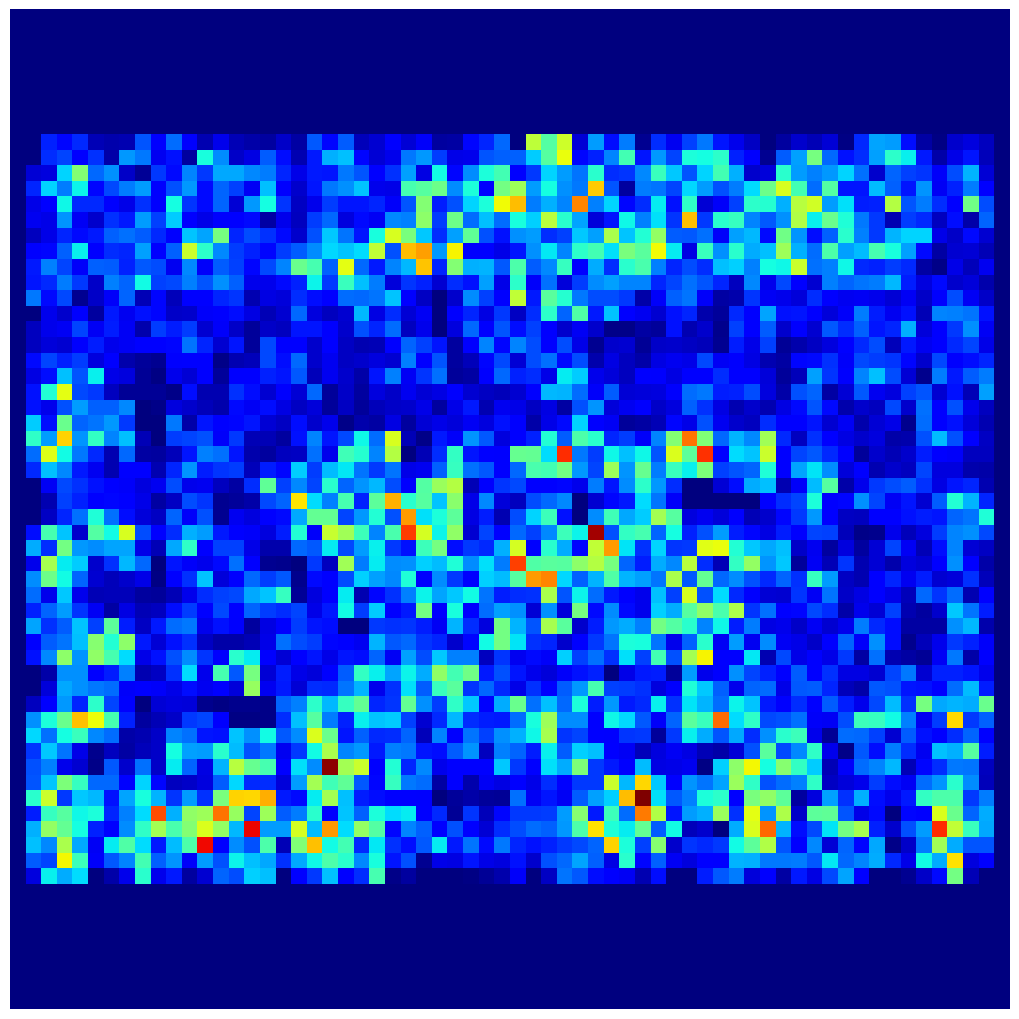

In [125]:
import os

os.makedirs("frmaes of S_map", exist_ok=True)
for i in range(len(saliency_maps[0][0])):
    fig, ax = plt.subplots(figsize=(10, 10))
    frame_saliency_map = saliency_maps[0][0, i] 
    plt.imshow(frame_saliency_map, cmap="jet")
    plt.tight_layout()
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove extra white space

    plt.savefig(f"frmaes of S_map/saliency_Map{i}.png", dpi=500)
    plt.show()


In [126]:
# Assuming saliency_maps contains your computed temporal saliency maps (list of 2D numpy arrays)
# Each 2D array corresponds to the saliency map for a frame in the video sequence

# Compute the average saliency value for each frame
average_saliency_values = [np.mean(saliency_map) for saliency_map in saliency_maps[0]]

# Find the frame index with the highest average saliency value
most_important_frame_index = np.argmax(average_saliency_values)

# Most important frame number (index + 1, assuming 1-based indexing)
most_important_frame_number = most_important_frame_index + 1

print(f"Most important frame for prediction: Frame {most_important_frame_number}")


Most important frame for prediction: Frame 1


## CREATING A VIDEO FROM ORIGANL FRAMES AND SALIENCY MAP (FRAMES) TO SHOW THEIR ACTIVATION FUNCTION WORK OR NOT 

In [139]:
import cv2
import os

# Directory containing original frames and saliency maps
original_frames_directory = "frames orignal/"
saliency_maps_directory = "frmaes of S_map"

# Get the list of frame files for original frames and saliency maps
original_frame_files = sorted([os.path.join(original_frames_directory, file) for file in os.listdir(original_frames_directory)])
saliency_map_files = sorted([os.path.join(saliency_maps_directory, file) for file in os.listdir(saliency_maps_directory)])

# Read the first original frame to get dimensions
original_frame = cv2.imread(original_frame_files[0])
height, width, layers = original_frame.shape

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use 'XVID' or 'MJPG' as codecs
video_output = cv2.VideoWriter('original_and_saliency_map_video.mp4', fourcc, 3.0, (2 * width, height))

# Iterate through the frame files and write them to the video
for original_frame_file, saliency_map_file in zip(original_frame_files, saliency_map_files):
    original_frame = cv2.imread(original_frame_file)
    saliency_map = cv2.imread(saliency_map_file)

    # Resize saliency map to match original frame dimensions
    saliency_map = cv2.resize(saliency_map, (width, height))

    # Concatenate original frame and saliency map horizontally
    concatenated_frame = cv2.hconcat([original_frame, saliency_map])
    video_output.write(concatenated_frame)

# Release the VideoWriter
video_output.release()

print("Video created successfully.")


Video created successfully.


In [136]:
print(original_frame_files)
print(saliency_map_files)
print("Original frame dimensions:", original_frame.shape)
print("Saliency map dimensions:", saliency_map.shape)



['frames orignal\\smframe1.png', 'frames orignal\\smframe10.png', 'frames orignal\\smframe11.png', 'frames orignal\\smframe12.png', 'frames orignal\\smframe13.png', 'frames orignal\\smframe14.png', 'frames orignal\\smframe15.png', 'frames orignal\\smframe16.png', 'frames orignal\\smframe17.png', 'frames orignal\\smframe18.png', 'frames orignal\\smframe19.png', 'frames orignal\\smframe2.png', 'frames orignal\\smframe20.png', 'frames orignal\\smframe3.png', 'frames orignal\\smframe4.png', 'frames orignal\\smframe5.png', 'frames orignal\\smframe6.png', 'frames orignal\\smframe7.png', 'frames orignal\\smframe8.png', 'frames orignal\\smframe9.png']
['frmaes of S_map\\saliency_Map0.png', 'frmaes of S_map\\saliency_Map1.png', 'frmaes of S_map\\saliency_Map10.png', 'frmaes of S_map\\saliency_Map11.png', 'frmaes of S_map\\saliency_Map12.png', 'frmaes of S_map\\saliency_Map13.png', 'frmaes of S_map\\saliency_Map14.png', 'frmaes of S_map\\saliency_Map15.png', 'frmaes of S_map\\saliency_Map16.png'

In [138]:
pwd

'D:\\FAISAL FYP\\fyb final result XAI'

In [61]:
# from keras.models import load_model

# model = load_model('lrcn_model.h5')


## INTERATED_SALIENCY MAP

In [62]:
def generate_integrated_gradients(model, video_frames):
    # Convert video_frames to a TensorFlow tensor
    video_frames = tf.convert_to_tensor(video_frames, dtype=tf.float32)
    video_frames = tf.expand_dims(video_frames, axis=0)  # Add a batch dimension
    
    # Baseline (initial) tensor with zeros having the same shape as video_frames
    baseline = tf.zeros_like(video_frames)
    
    # Create a list to store intermediate integrated gradients
    integrated_gradients = []
    
    # Number of steps for approximation (can be adjusted based on accuracy requirements)
    num_steps = 50
    
    # Calculate integrated gradients
    for alpha in np.linspace(0, 1, num_steps):
        interpolated_input = baseline + alpha * (video_frames - baseline)
        
        with tf.GradientTape() as tape:
            tape.watch(interpolated_input)
            predictions = model(interpolated_input, training=False)
            predicted_class_score = predictions[:, 0]  # Assuming binary classification
            print("predicted_score",predicted_class_score)
        
        # Calculate gradients of the predicted class score with respect to the interpolated input
        gradients = tape.gradient(predicted_class_score, interpolated_input)
        
        # Calculate the absolute mean of gradients along the frame dimension
        integrated_gradient = tf.reduce_mean(tf.abs(gradients), axis=-1)
        
        # Append integrated gradients to the list
        integrated_gradients.append(integrated_gradient.numpy())
    
    # Average the integrated gradients over the steps
    avg_integrated_gradients = np.mean(integrated_gradients, axis=0)
    print(len(integrated_gradients))
    
    # Normalize the saliency map
    normalized_saliency_map = (avg_integrated_gradients - np.min(avg_integrated_gradients)) / (np.max(avg_integrated_gradients) - np.min(avg_integrated_gradients))
    
    return normalized_saliency_map


## from user input vidoes

In [63]:
import cv2
import numpy as np

# Read the video file
cap = cv2.VideoCapture('V_27.mp4')
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

# Choose a segment of 20 frames (adjust the start and end indices as needed)
selected_frames = frames[:20]

# Resize frames to match the expected spatial dimensions (64x64)
resized_frames = [cv2.resize(frame, (64, 64)) for frame in selected_frames]

# Convert frames to NumPy array
video_frames = np.array(resized_frames)

# Ensure the shape matches the expected input shape of your model
print("Shape of video frames before expanding dimensions:", video_frames.shape)



Shape of video frames before expanding dimensions: (20, 64, 64, 3)


In [64]:
# # Ensure the shape matches the expected input shape of your model
# print("Shape of video frames after expanding dimensions:", video_frames.shape)

# # Generate saliency maps using the modified input data
# saliency_maps = generate_integrated_gradients(model, video_frames)


In [65]:
# take a video from test data

In [66]:

# # Generate integrated gradients for a specific video
# video_index = 0  # Replace with the index of the video you want to visualize
# video_frames = features_test[video_index]

# Generate integrated gradients using the function
saliency_map_integrated_gradients = generate_integrated_gradients(model, video_frames)



predicted_score tf.Tensor([0.5], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.47011685], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.44804636], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.4343488], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.42183125], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.41352022], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.41204458], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.41760555], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.42895317], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.4437845], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.45943868], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.47422057], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.48704824], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.49754697], shape=(1,), dtype=float32)
predicted_score tf.Tensor([0.50587374], shape=(1,), dtype=float32)
pred

In [67]:
# saliency_map_integrated_gradients.shape

In [68]:

# plt.imshow(saliency_map_integrated_gradients[0][0],cmap="jet")

In [69]:
video_frames.shape

(20, 64, 64, 3)

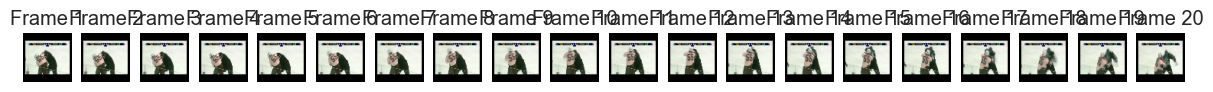

In [150]:
import matplotlib.pyplot as plt

# Visualize Temporal Saliency Map
plt.figure(figsize=(15, 5))
for i in range(len(video_frames)):
    plt.subplot(2, SEQUENCE_LENGTH, i + 1)
    plt.imshow(video_frames[i])
    plt.axis('off')
    plt.title(f'Frame {i + 1}')



In [71]:
import matplotlib.pyplot as plt
import os

# Create a directory to save the original frames without borders
os.makedirs("original_frames", exist_ok=True)

# Visualize and save original frames without borders
plt.figure(figsize=(15, 5))
for i in range(len(video_frames)):
    plt.subplot(2, SEQUENCE_LENGTH, i + 1)
    plt.imshow(video_frames[i])
    plt.axis('off')
#     plt.title(f'Frame {i + 1}')
    
    # Save the frame without borders
    plt.savefig(f"original_frames/frame_{i + 1}.png", bbox_inches='tight', pad_inches=0, dpi=500)
    plt.close()

print("Original frames without borders saved in 'original_frames' folder.")


Original frames without borders saved in 'original_frames' folder.


Original frames without borders saved in 'original_frames' folder.


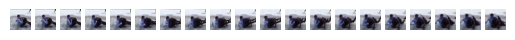

In [72]:
import matplotlib.pyplot as plt

# Visualize and save original frames without borders
# plt.figure(figsize=(15, 5))
for i in range(len(video_frames)):
    plt.subplot(2, SEQUENCE_LENGTH, i + 1)
    plt.imshow(video_frames[i])
    plt.axis('off')
#     plt.title(f'Frame {i + 1}')
    

print("Original frames without borders saved in 'original_frames' folder.")


In [73]:


# # Visualize Integrated Gradients
# # plt.subplot(2, SEQUENCE_LENGTH, SEQUENCE_LENGTH + 2)
# plt.imshow(saliency_map_integrated_gradients, cmap='jet')
# plt.axis('off')
# plt.title('Integrated Gradients Saliency Map')

# plt.tight_layout()
# plt.show()


In [74]:
# import os

# # Assuming saliency_maps is a list containing saliency maps for each frame

# # Create a directory to save the images
# os.makedirs("frames of integrate", exist_ok=True)

# # Loop through the frames and save images
# for i in range(20):
#     plt.imshow(saliency_maps[0][0, i], cmap='jet')
#     plt.axis('off')
#     plt.title(f'Temporal Saliency Map {i + 1}')
# #     plt.savefig(f"frsmessaliency/saliency_Map{i}.png", dpi=500)
#     plt.show()

In [75]:
# import matplotlib.pyplot as plt

# # Visualize Integrated Gradients Saliency Maps for all frames
# # plt.figure(figsize=(15, 5))
# import os

# # Assuming saliency_maps is a list containing saliency maps for each frame

# # Create a directory to save the images
# os.makedirs("frames of integrated xai", exist_ok=True)

# for i in range(len(saliency_map_integrated_gradients[0])):
#     # Visualize Integrated Gradients Saliency Maps for each frame
# #     plt.subplot(1, len(saliency_map_integrated_gradients[0]), i + 1)
#     plt.imshow(saliency_map_integrated_gradients[0][i], cmap='plasma')
#     plt.savefig(f"frames of integrated xai/integrated_saliency_Map{i}.png", dpi=500)
#     plt.axis('off')
#     plt.title(f'Frame {i + 1}')

# #     plt.tight_layout()
#     plt.show()
    
    


In [76]:
import matplotlib.pyplot as plt
import os
 


os.makedirs("frames_of_integrated_xai", exist_ok=True)

for i in range(len(saliency_map_integrated_gradients[0])):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(saliency_map_integrated_gradients[0][i], cmap='jet')
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove extra white space
    plt.savefig(f"frames_of_integrated_xai/integrated_saliency_Map{i}.png", bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)


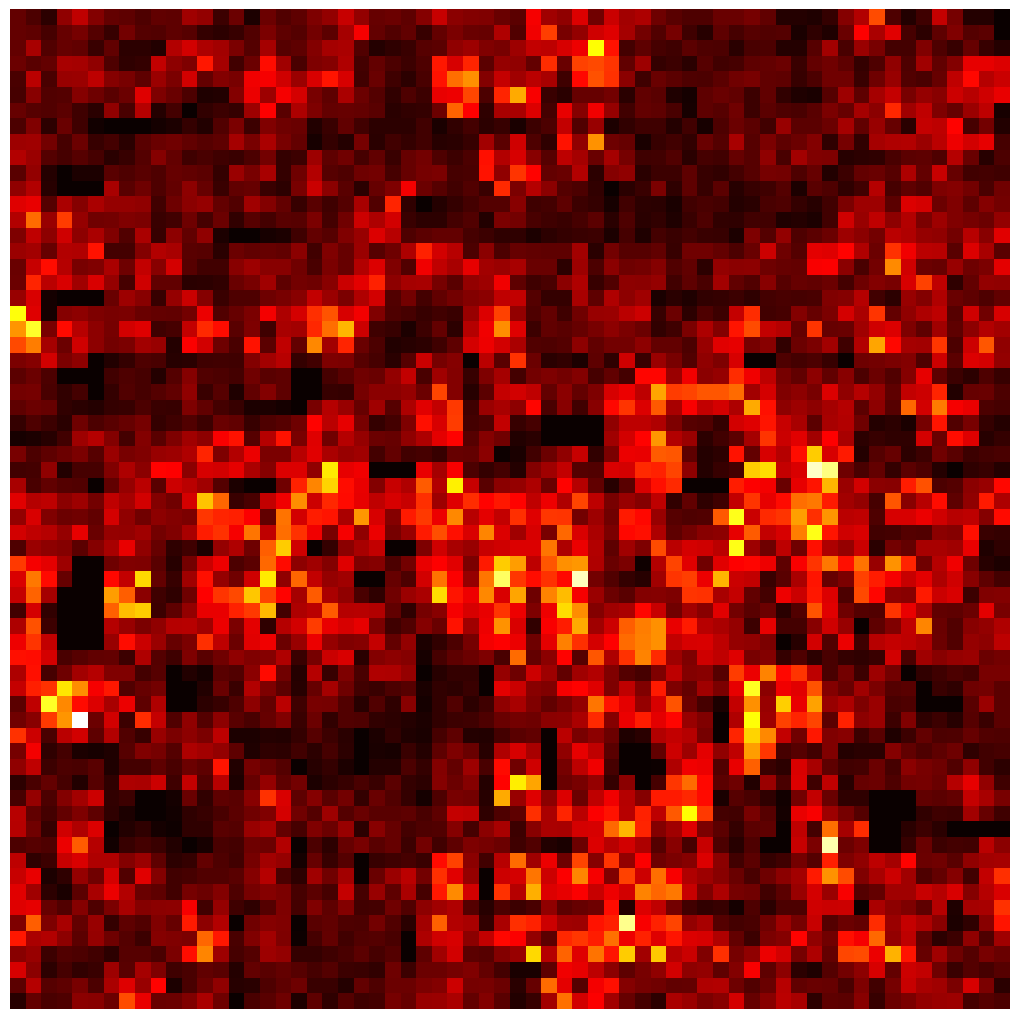

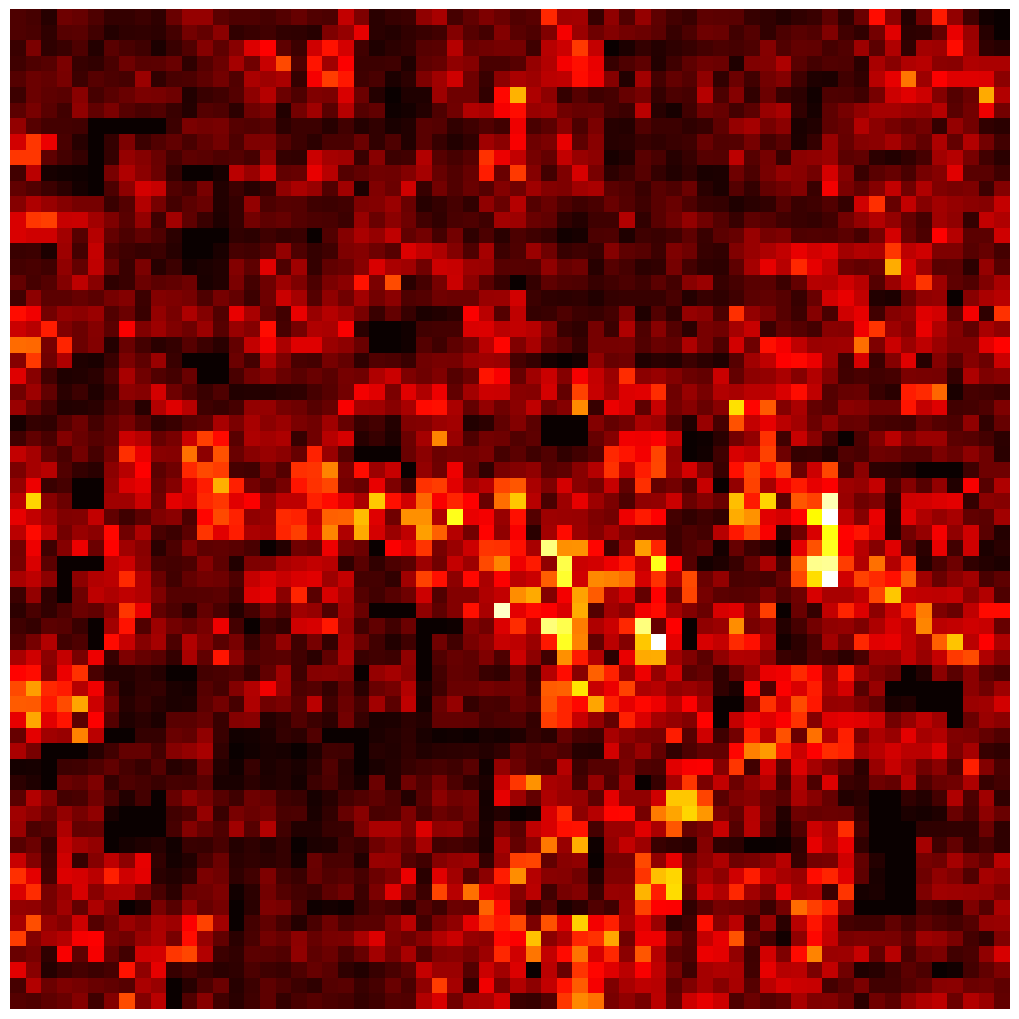

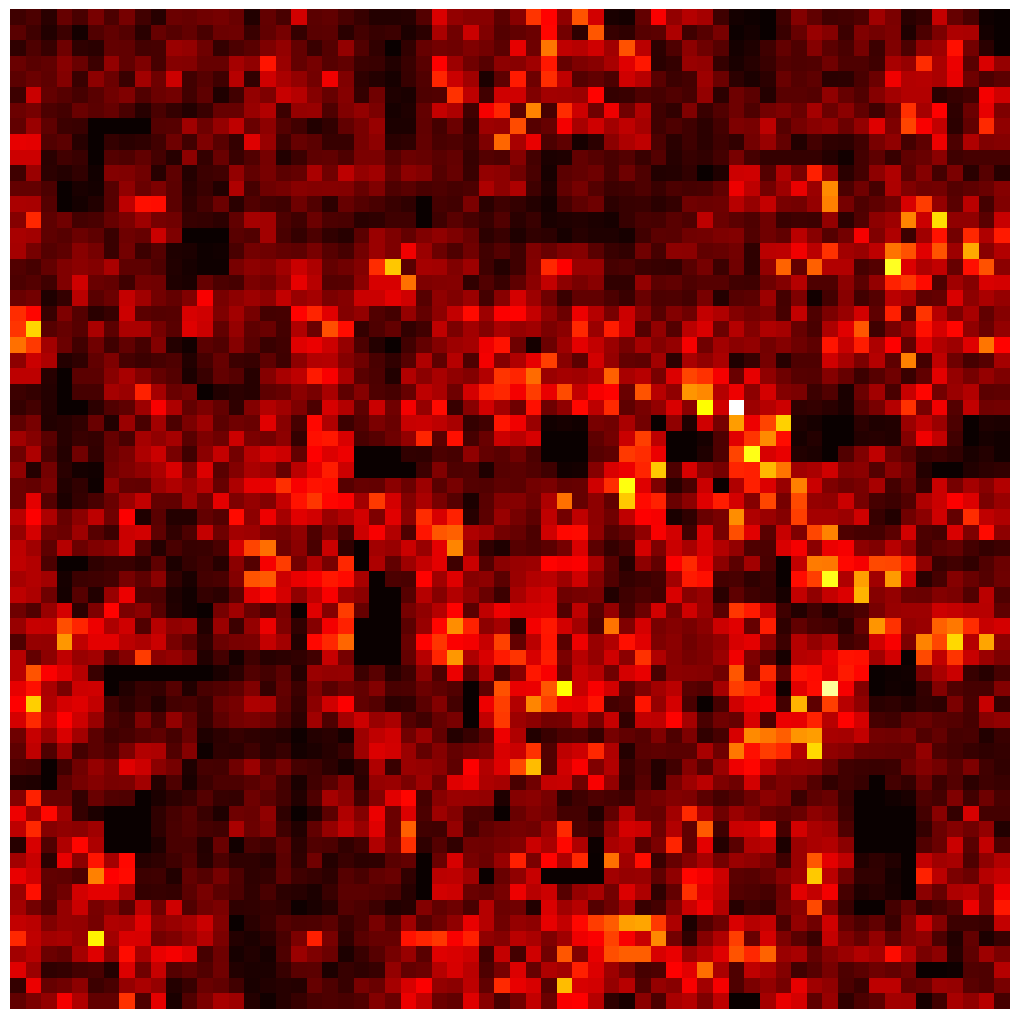

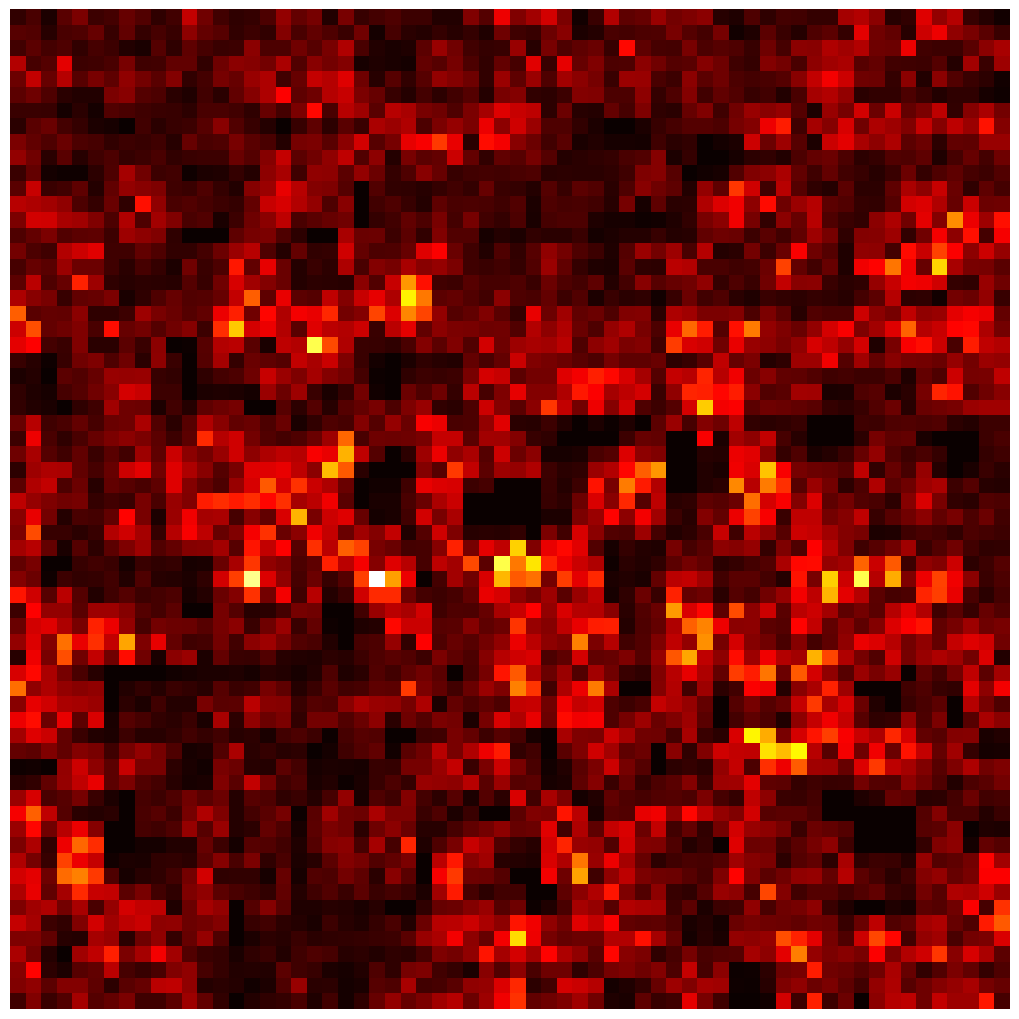

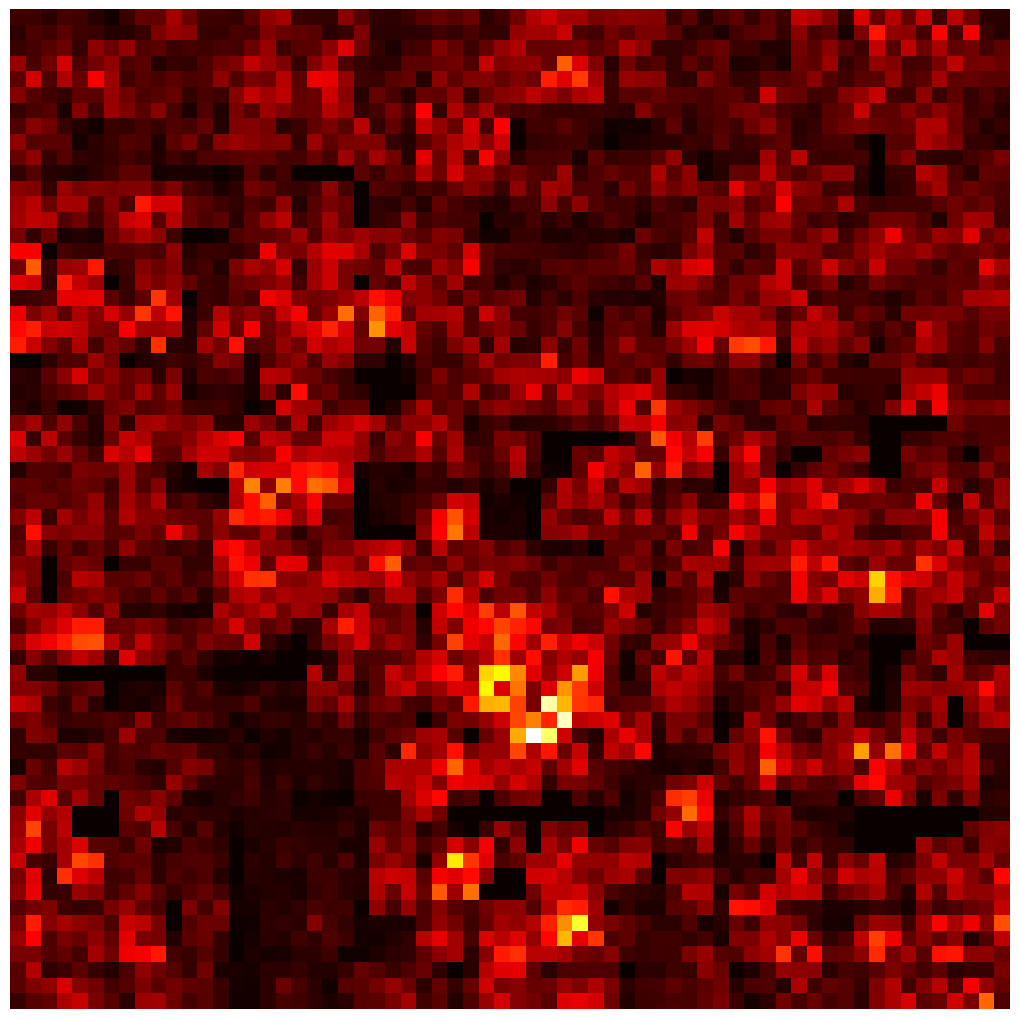

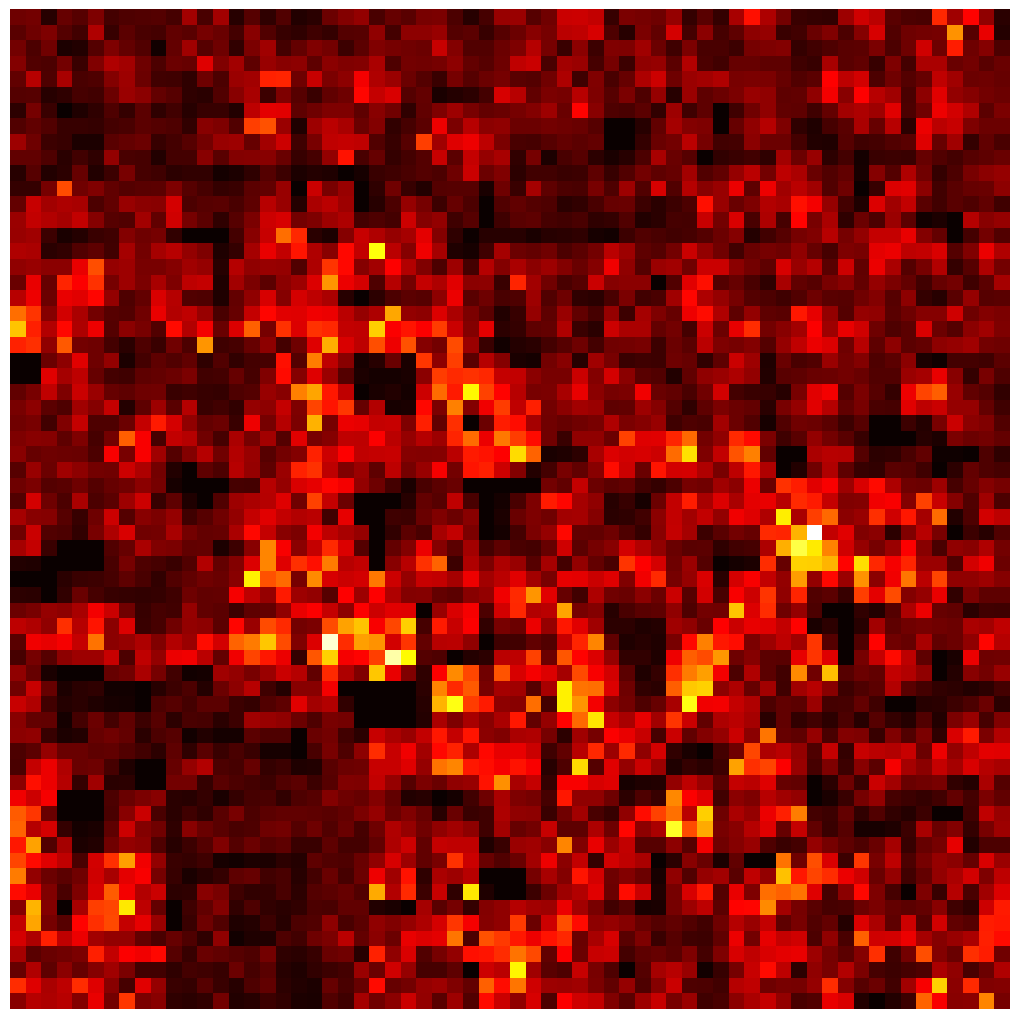

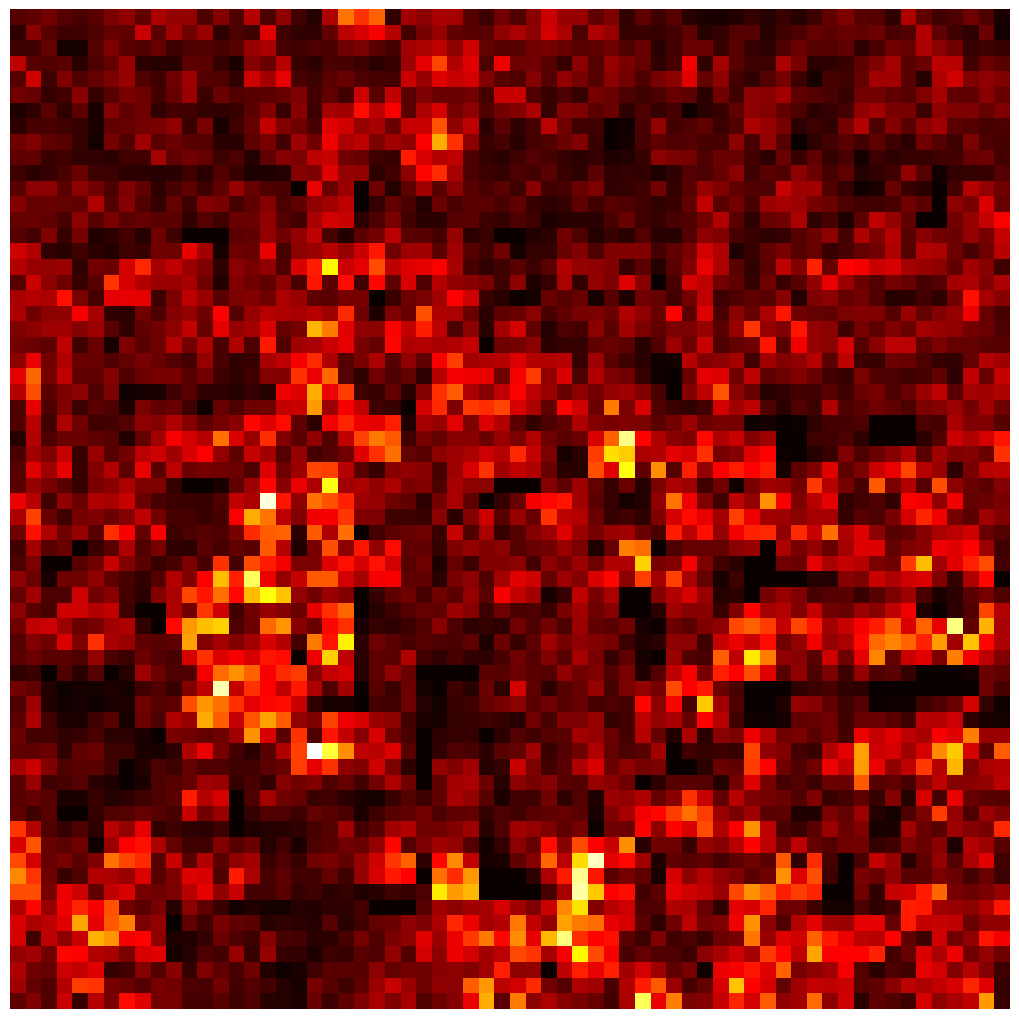

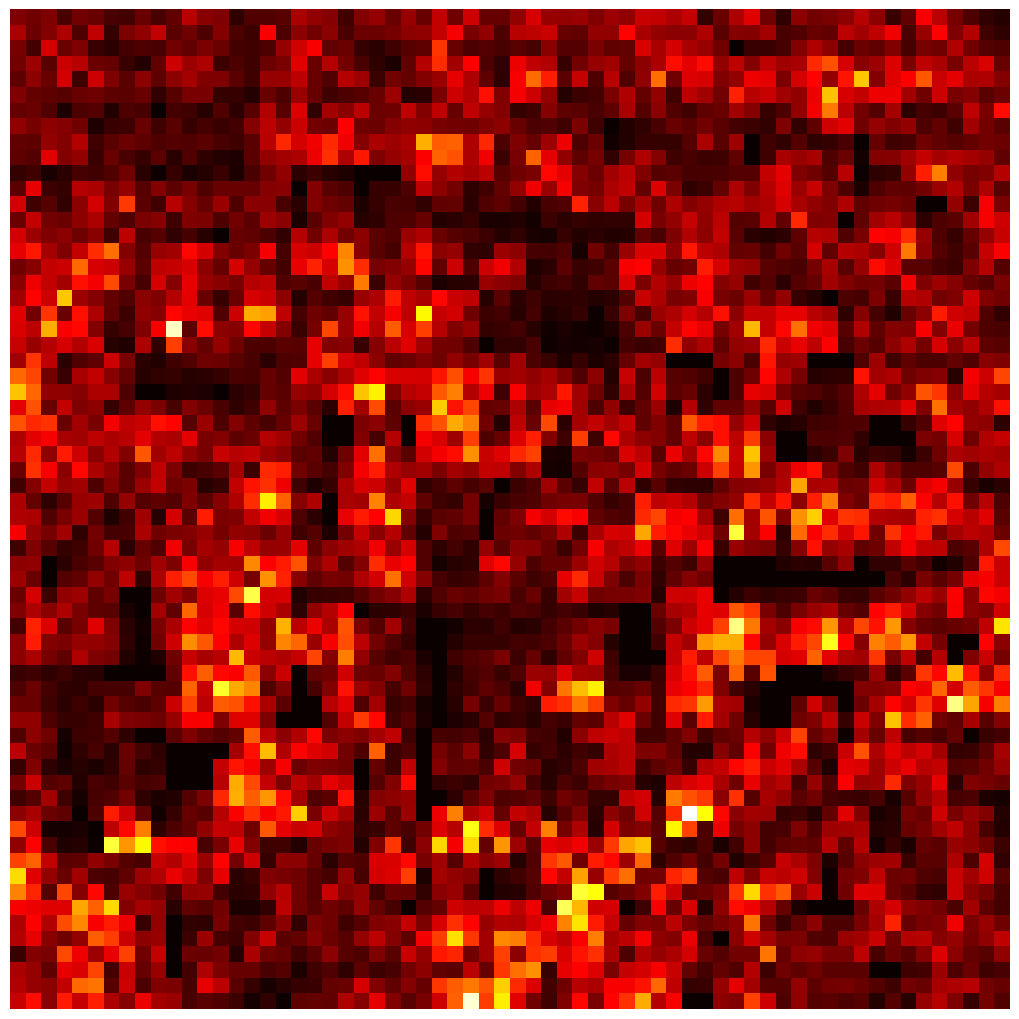

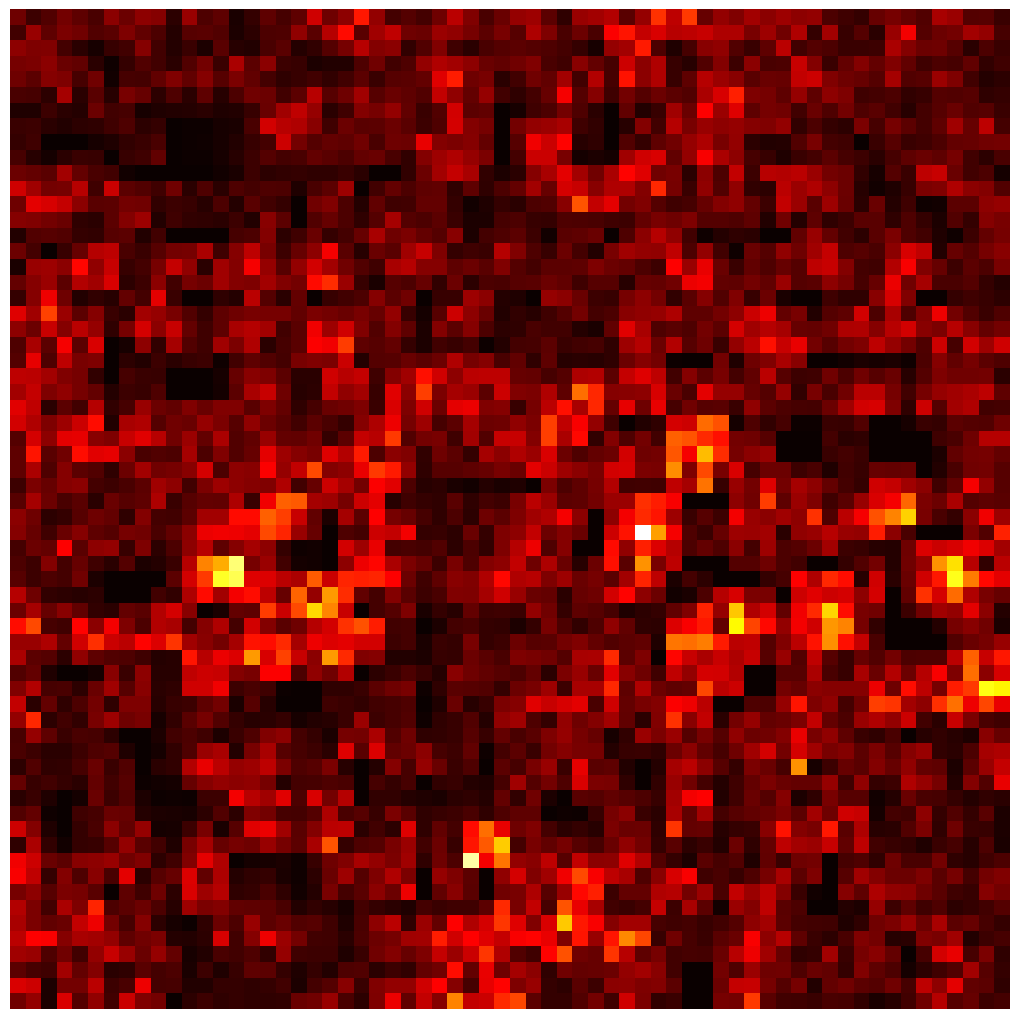

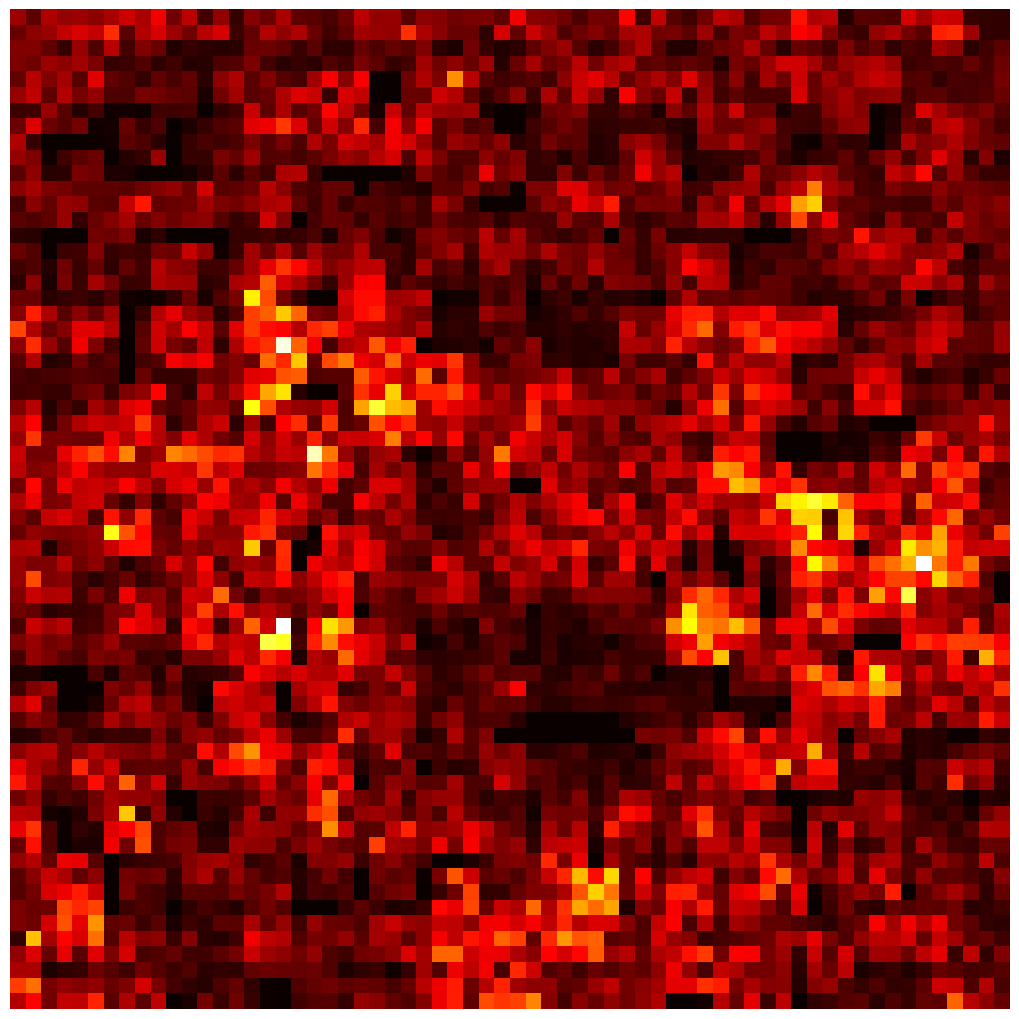

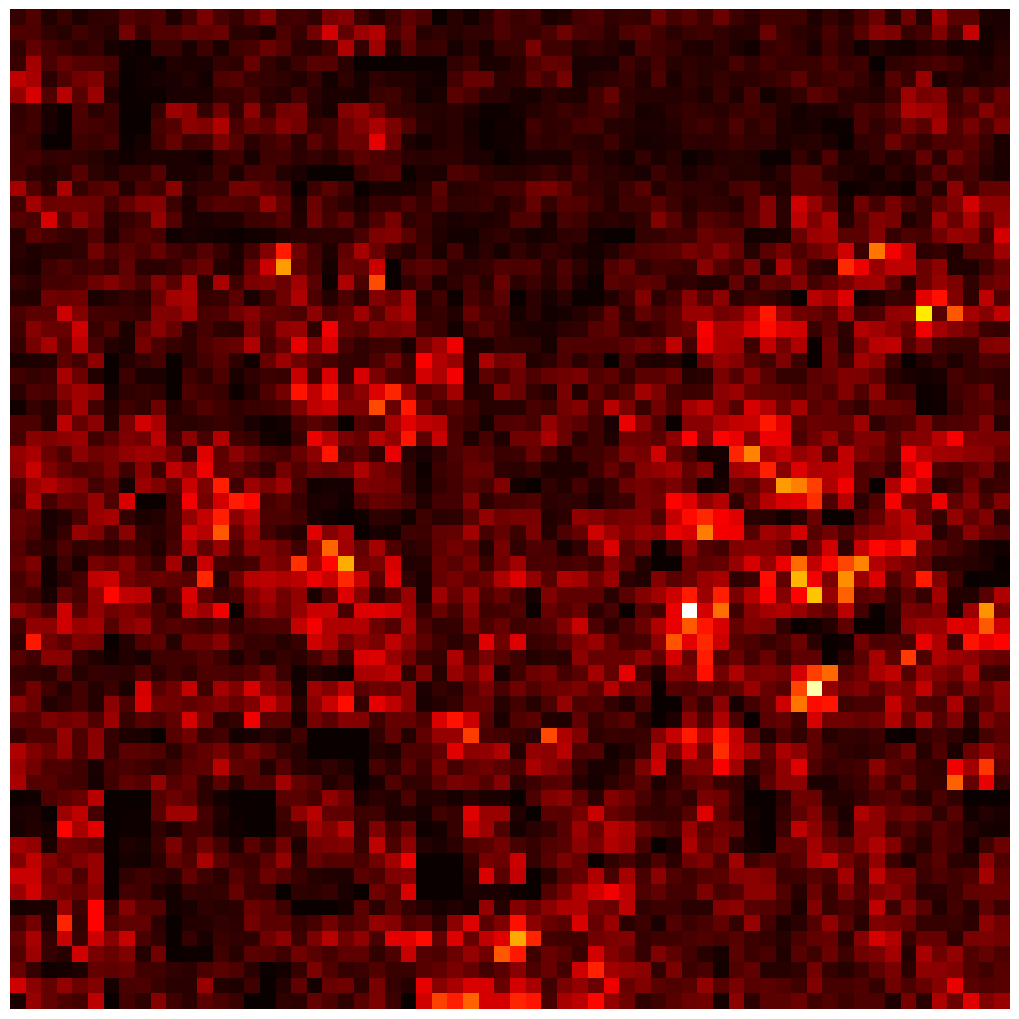

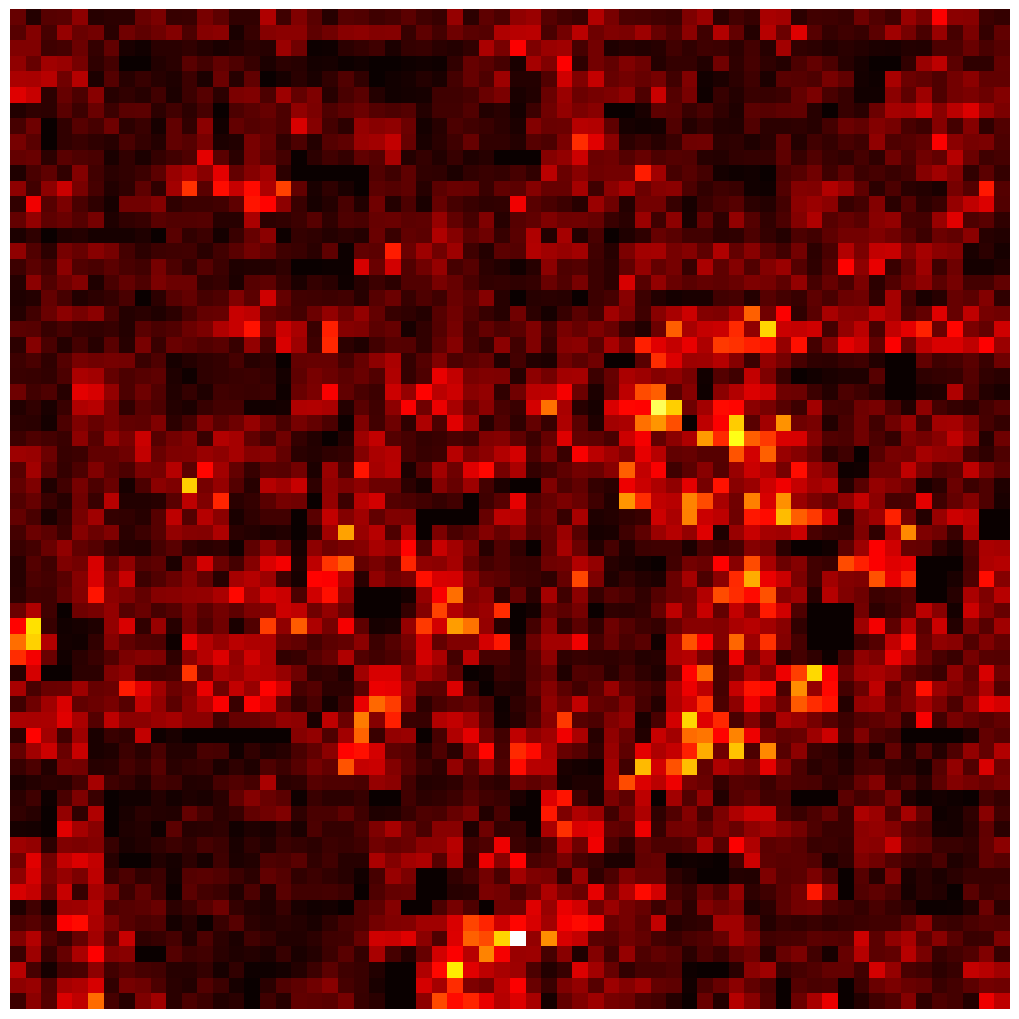

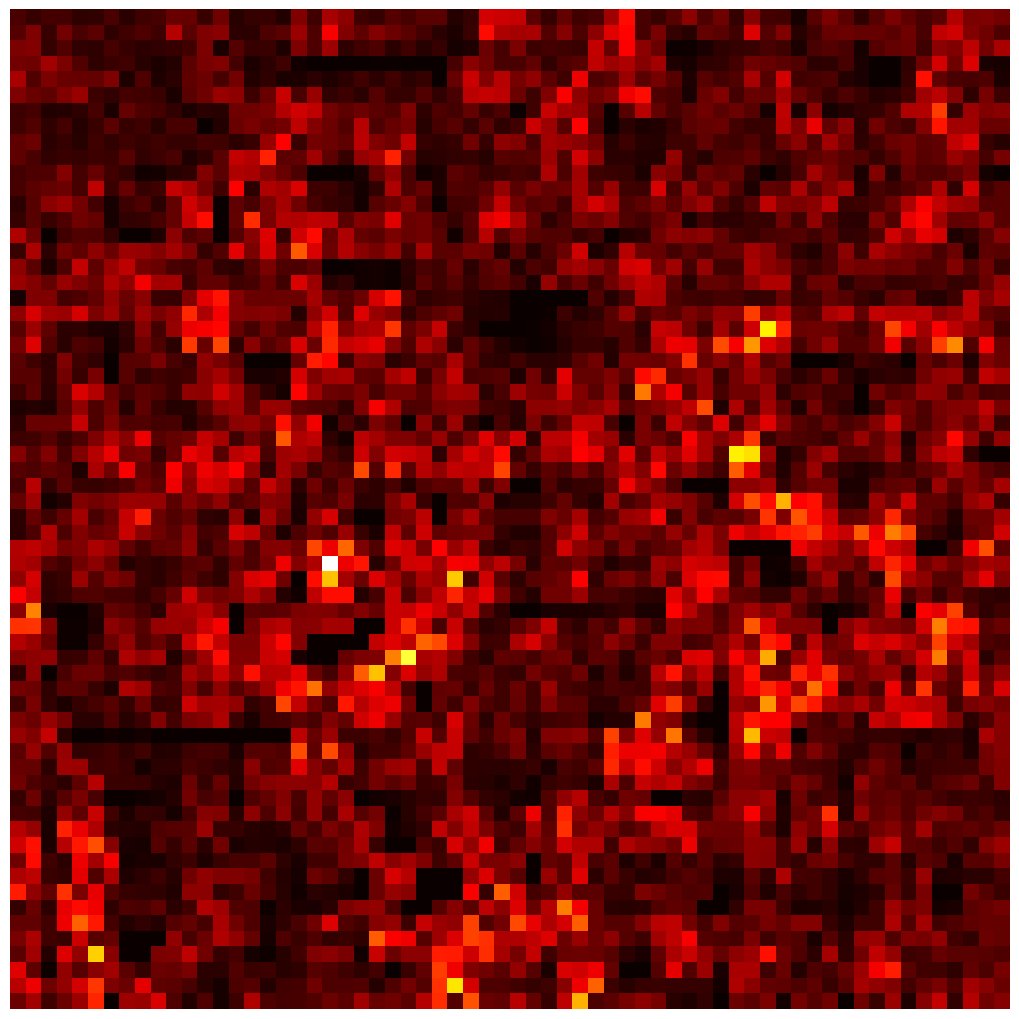

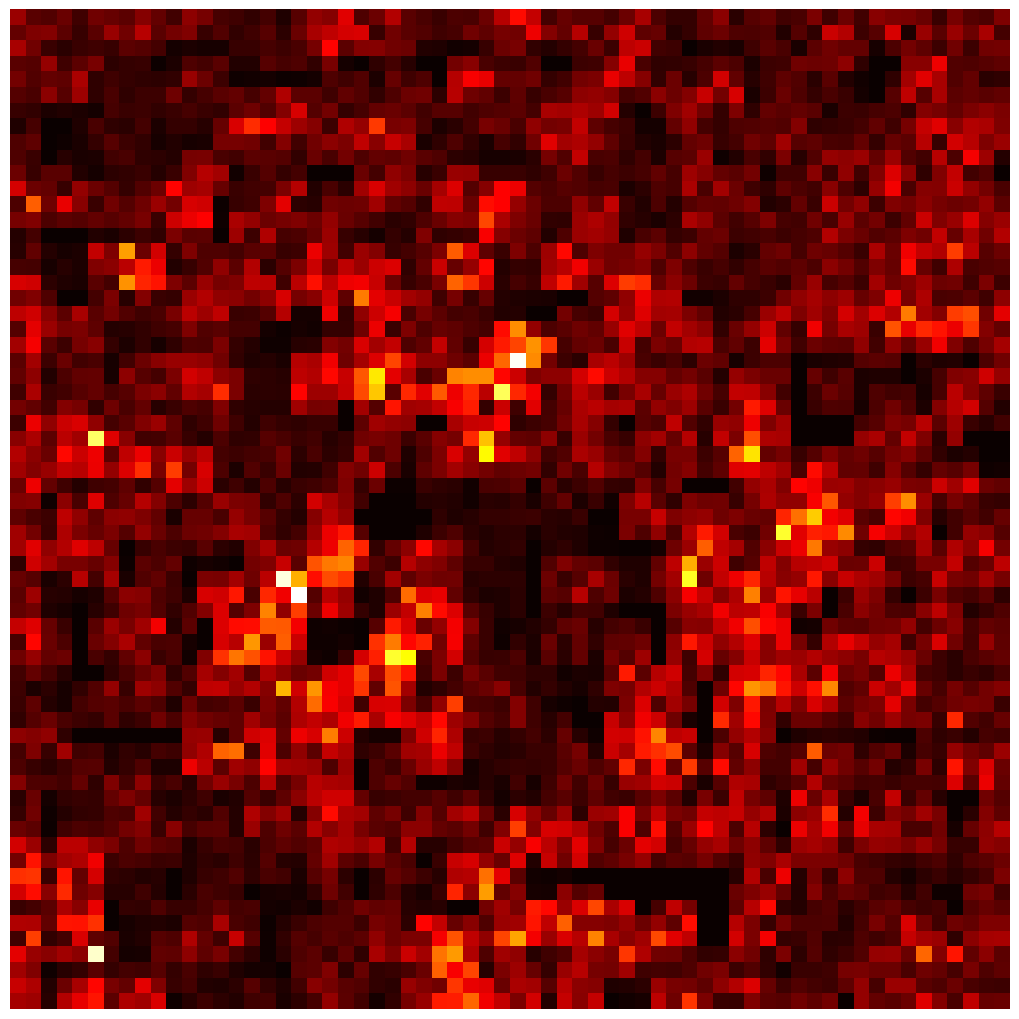

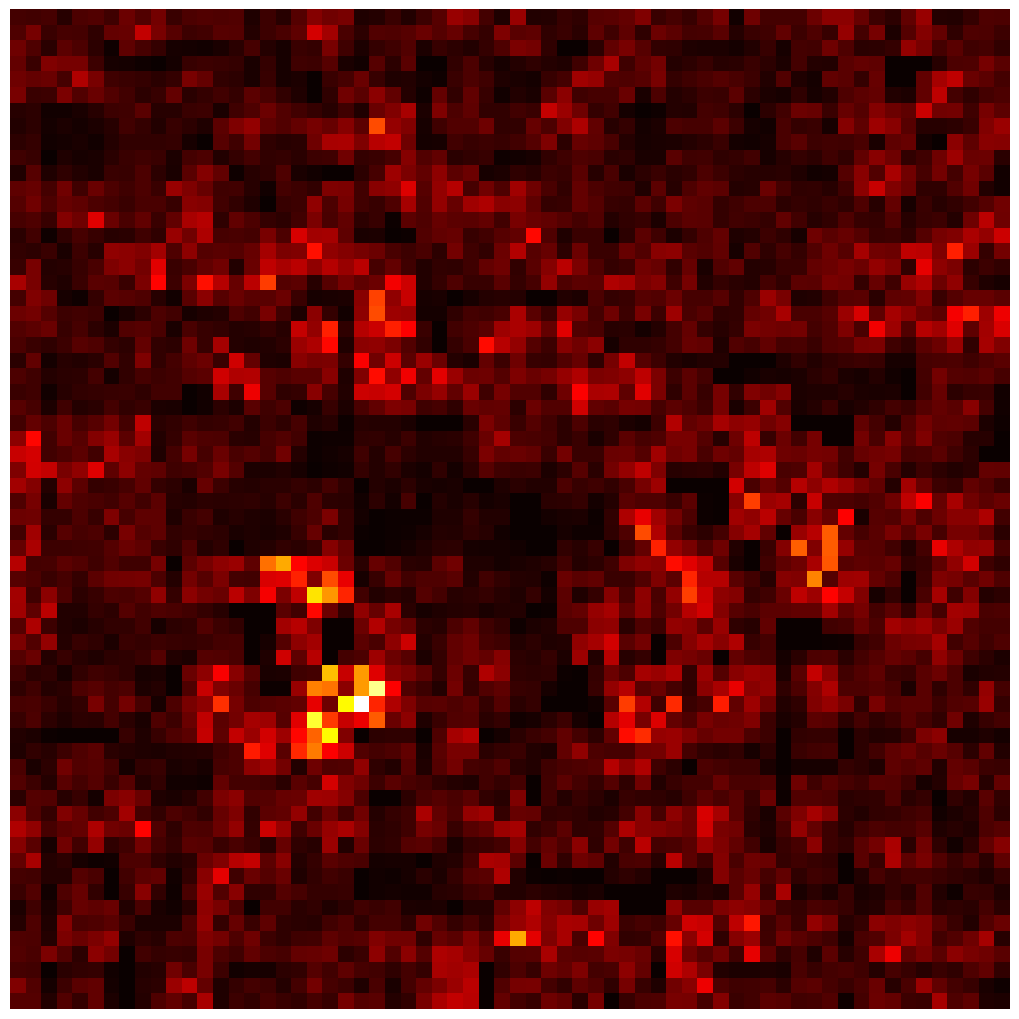

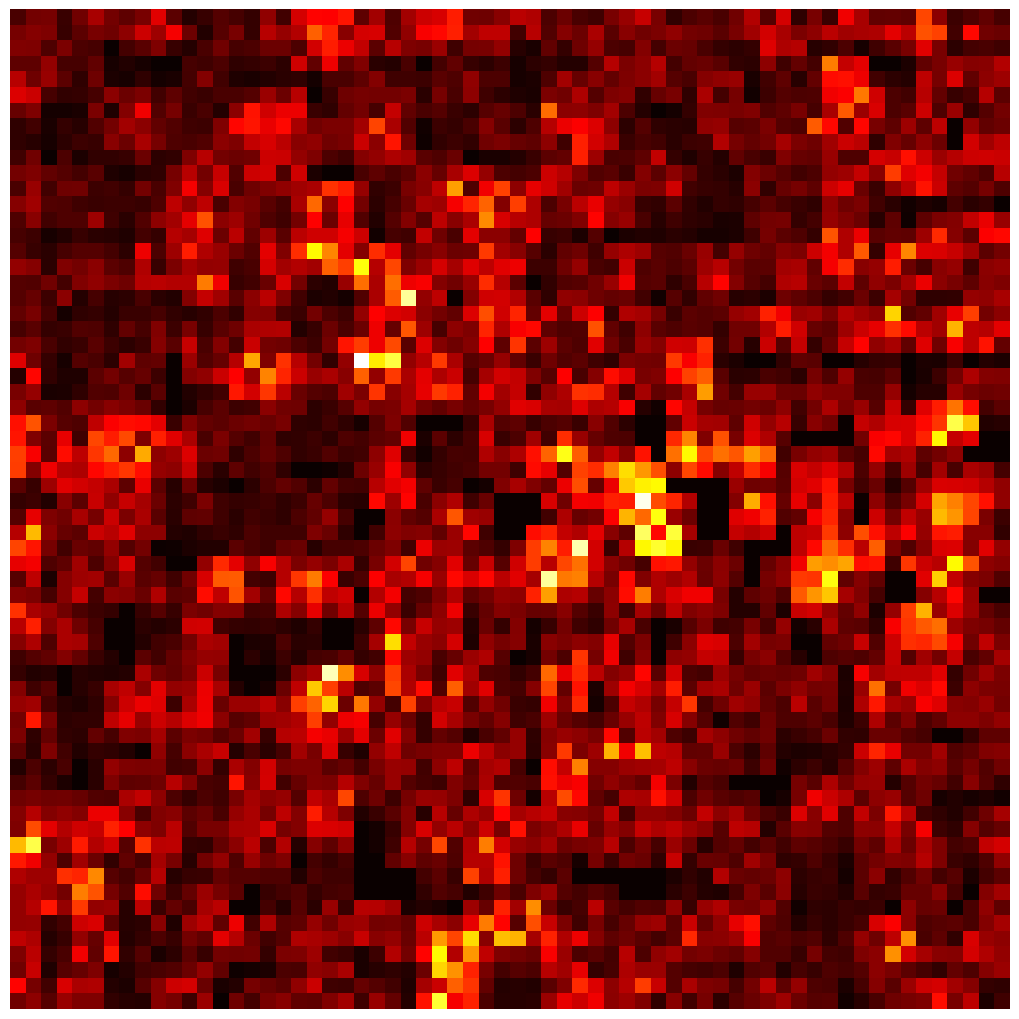

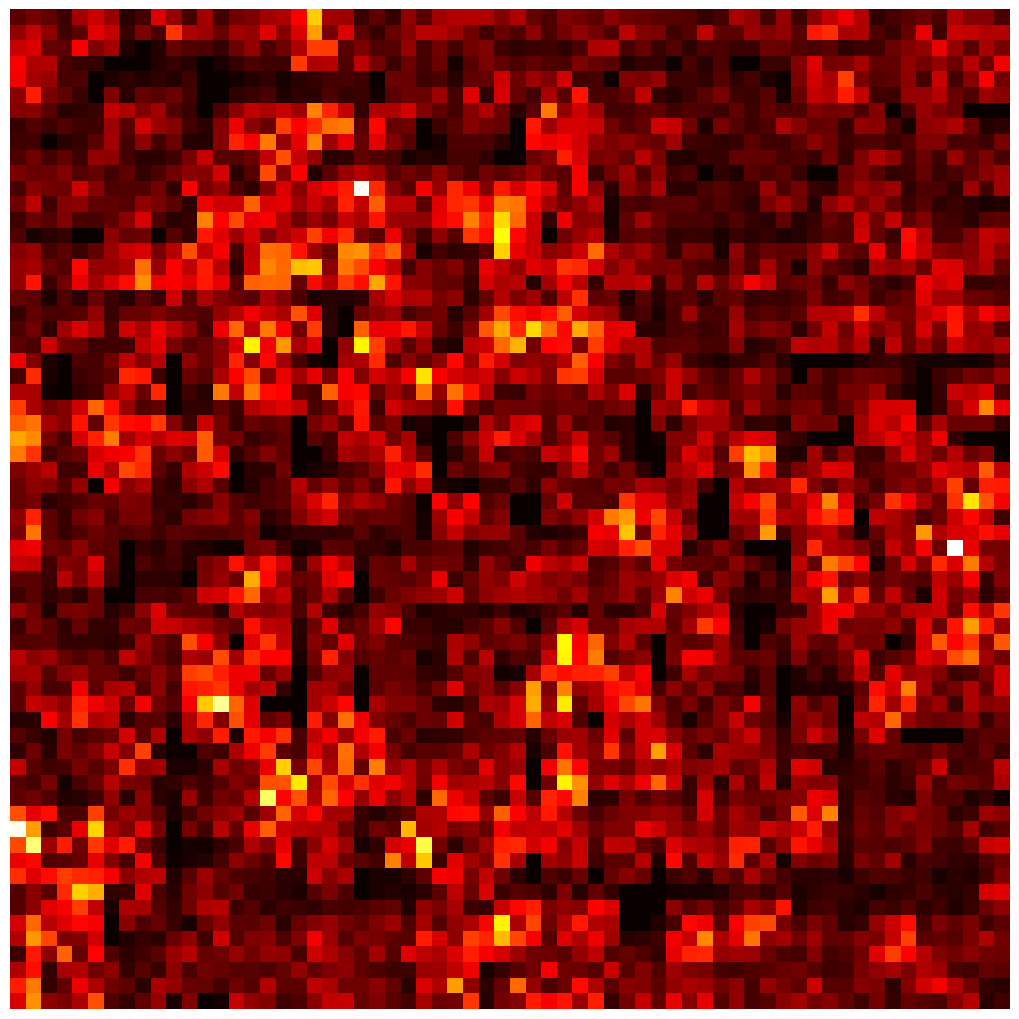

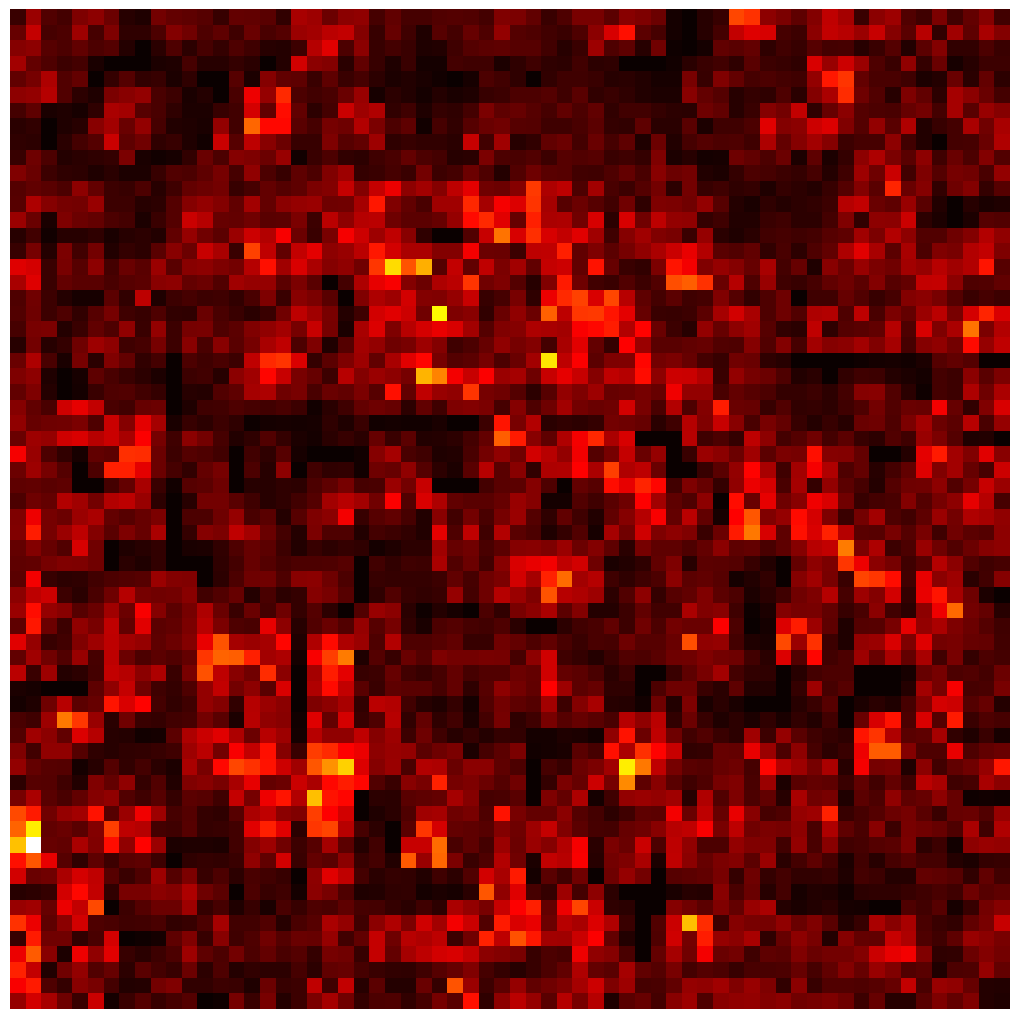

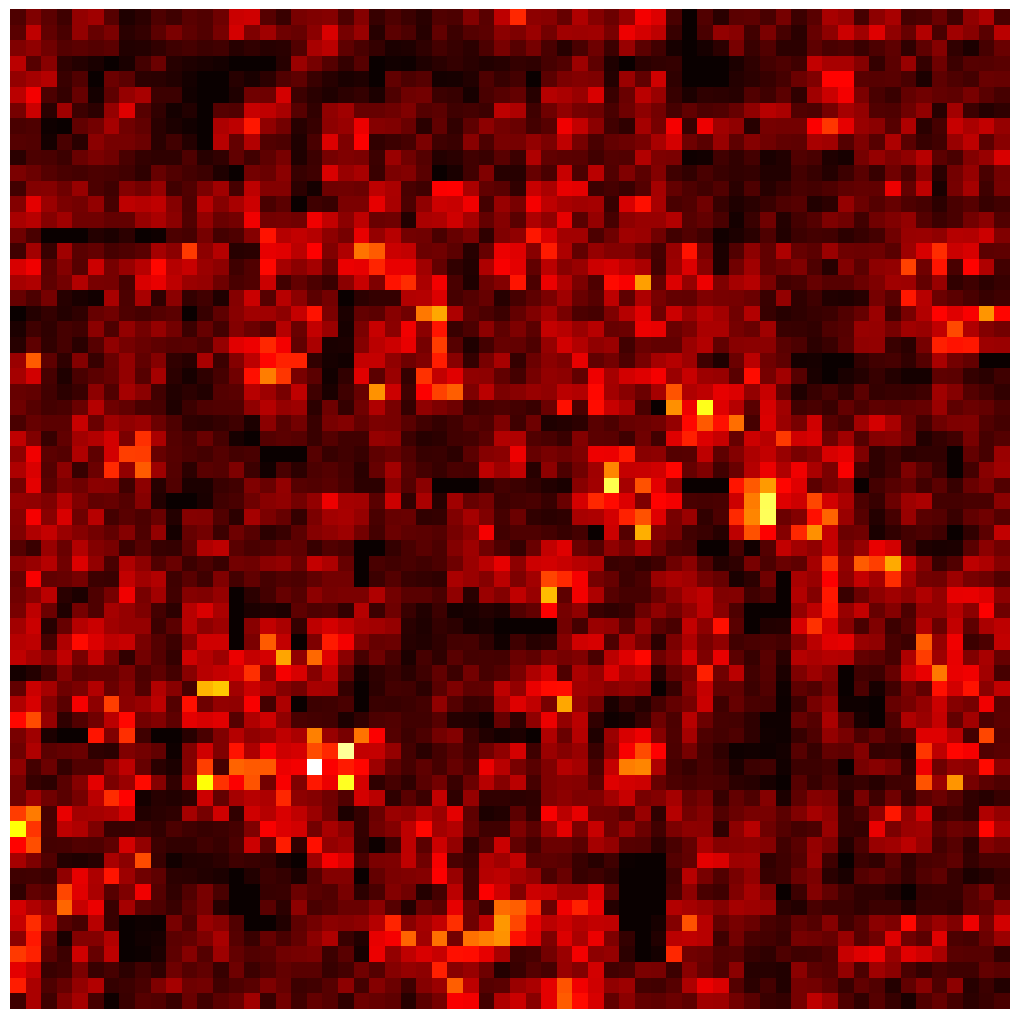

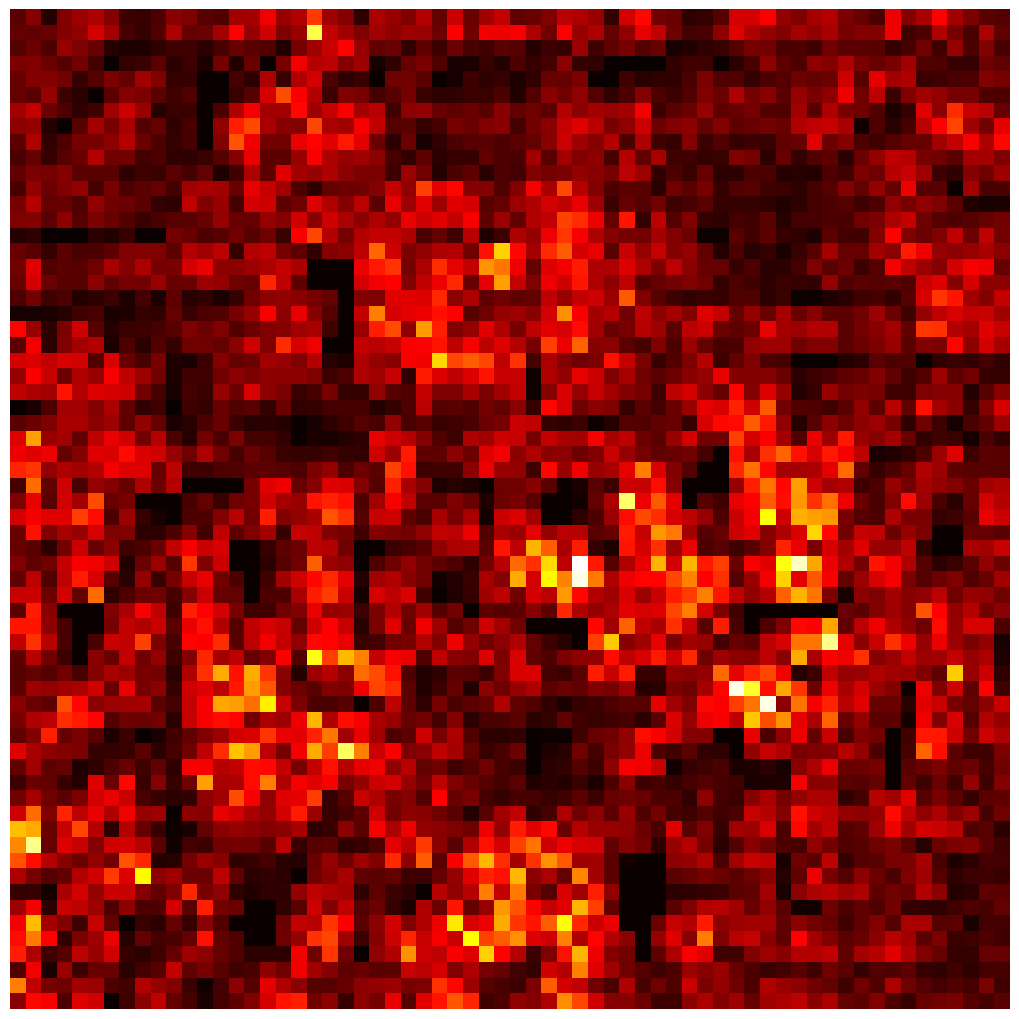

In [149]:
import matplotlib.pyplot as plt

for i in range(len(saliency_map_integrated_gradients[0])):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(saliency_map_integrated_gradients[0][i], cmap='hot')
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove extra white space
#     plt.savefig(f"frames_of_integrated_xai/integrated_saliency_Map{i}.png", bbox_inches='tight', pad_inches=0, dpi=300)
#     plt.close(fig)


In [78]:

# Find the most important frame
most_important_frame_index = np.argmax(np.mean(saliency_map_integrated_gradients, axis=(1, 2)))
print(f"Most important frame according to Integrated Gradients: Frame {most_important_frame_index}")

Most important frame according to Integrated Gradients: Frame 1


# make video from saliency

In [79]:
# import cv2
# import os


# frames_directory = "frames_of_integrated_xai"


# frame_files = sorted([os.path.join(frames_directory, file) for file in os.listdir(frames_directory)])

# # Read the first frame to get dimensions
# frame = cv2.imread(frame_files[0])
# height, width, layers = frame.shape

# # Define the codec and create a VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use 'XVID' or 'MJPG' as codecs
# video_output = cv2.VideoWriter('integrated_saliency_map_video.mp4', fourcc, 3.0, (width, height))

# # Iterate through the frame files and write them to the video
# for frame_file in frame_files:
#     frame = cv2.imread(frame_file)
#     video_output.write(frame)


# video_output.release()



## video have both frames orignal and saliency maps

In [145]:
import cv2
import os

# Directory containing the original frames without borders
original_frames_directory = "original_frames"

# Directory containing the integrated saliency map frames without borders
integrated_frames_directory = "frames_of_integrated_xai"

# Get the list of frame files for both original and integrated frames
original_frame_files = sorted([os.path.join(original_frames_directory, file) for file in os.listdir(original_frames_directory)])
integrated_frame_files = sorted([os.path.join(integrated_frames_directory, file) for file in os.listdir(integrated_frames_directory)])

# Read the first frame from original frames to get dimensions
original_frame = cv2.imread(original_frame_files[0])
height, width, layers = original_frame.shape

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use 'XVID' or 'MJPG' as codecs
video_output = cv2.VideoWriter('original_and_integrated_video.mp4', fourcc, 3.0, (width * 2, height))

# Iterate through the frame files and write them to the video
for original_frame_file, integrated_frame_file in zip(original_frame_files, integrated_frame_files):
    original_frame = cv2.imread(original_frame_file)
    integrated_frame = cv2.imread(integrated_frame_file)
    
    # Resize frames to match the dimensions if necessary
    original_frame = cv2.resize(original_frame, (width, height))
    integrated_frame = cv2.resize(integrated_frame, (width, height))
    
    # Concatenate original and integrated frames horizontally
    concatenated_frame = cv2.hconcat([original_frame, integrated_frame])
    
    video_output.write(concatenated_frame)

video_output.release()
